# Instalações de Bibliotecas

In [62]:
pip install -r "C:\Users\Yasin Mghazli\Documents\Mestrado\TimeSeries\requeriment.txt"

  Using cached hurst-0.0.5-py3-none-any.whl (5.9 kB)
  Using cached numpy-1.21.4-cp310-cp310-win_amd64.whl (14.0 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached matplotlib-3.2.2.tar.gz (40.3 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas-1.3.5-cp310-cp310-win_amd64.whl (10.2 MB)
  Using cached pmdarima-1.8.5-cp310-cp310-win_amd64.whl (603 kB)
  Using cached scipy-1.4.1.tar.gz (24.6 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [2495 lines of output]
      Ignoring numpy: markers 'python_version == "3.5" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.5" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
        Using cached wheel-0.37.1-py2.py

In [63]:
pip install tensorflow-gpu==2.0.0-beta1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
You should consider upgrading via the 'c:\Users\Yasin Mghazli\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [64]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Yasin Mghazli\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Import data

In [283]:
#IBOVESPA (^BVSP)
#NASDAQ Composite (^IXIC)
#Dow Jones Industrial Average (^DJI)
#CAC 40 (^FCHI)
#FTSE 100 (^FTSE) 
#DAX PERFORMANCE-INDEX (^GDAXI)
Indices = ["BVSP", "IXIC", "DJI", "FCHI", "FTSE", "GDAXI"]
index_train = "2000-01-01", "2016-12-31"
index_valid = "2017-01-01", "2018-12-31"
index_test = "2019-01-01", "2020-12-31"
index_novidades = "2021-01-01", "2021-12-31"

In [348]:
import pandas as pd
import yfinance as yf
from pathlib import Path  

def download_data(TS, start, end, interval = "1d", period = None,):  
    data = yf.download(  # or pdr.get_data_yahoo(...
            # tickers list or string as well
            tickers = TS,
            # use "period" instead of start/end
            # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            # (optional, default is '1mo')
            period = period,  
            start = start,
            end=end,          

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = interval,

            # group by ticker (to access via data['SPY'])
            # (optional, default is 'column')
            group_by = 'ticker',

            # adjust all OHLC automatically
            # (optional, default is False)
            auto_adjust = True,

            # download pre/post regular market hours data
            # (optional, default is False)
            prepost = False,

            # use threads for mass downloading? (True/False/Integer)
            # (optional, default is True)
            threads = True,

            # proxy URL scheme use use when downloading?
            # (optional, default is None)
            proxy = None
        )
    return data['Close'] 

def import_data(Indices,
            start="2000-01-05",
            end="2021-12-31"):
    
    indices_importados = []    
    for e in Indices:
        timeseries= download_data(TS=(str("^")+e), start=start,end=end)
        indices_importados.append(timeseries)
        
        # save to file
        filepath = Path(str(r"data\raw\^")+str(e)+str('.csv'))
        filepath.parent.mkdir(parents=True, exist_ok=True)          
        timeseries.to_csv(filepath)          
    return "Done importing"

In [350]:
import_data(Indices,start="2000-01-05",end="2021-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


'Done importing'

# Normalização

In [357]:
class MinMax:
    #The above code is creating a class called MinMaxScaler. The class has two functions: transform and inverse. 
    # The transform function takes in a data_transform and returns a transformed data_transform. 
    # The inverse function takes in a data_inverse and returns an inverse_transform.    
    def __init__(self, data_train, a, b): # a and b are the min and max values of the data_train   
        self.a = a
        self.b = b
        self.data_train = data_train
        self.min = self.data_train.min()
        self.max = self.data_train.max()    
        self.range = self.max - self.min                 

    def transform(self, data_transform): # data_transform is the data that we want to transform
        self.data_transform = data_transform
        self.transform = self.a + (self.data_transform - self.min)*(self.b-self.a) / self.range
        return self.transform
    
    def inverse(self, data_inverse):
        self.data_inverse = data_inverse
        self.inverse_transform = (self.data_inverse - self.a) * self.range / (self.b - self.a) + self.min
        return self.inverse_transform    

In [358]:
#Normalizing the data.
def normalized(Indices, index_train , a, b):   
    for e in Indices:        
        filepath = Path(str(r"data\raw\^")+str(e)+str('.csv'))
        data_train = pd.read_csv(filepath,index_col='Date')[index_train[0]:index_train[1]]
        data = pd.read_csv(filepath,index_col='Date')
        normalized = MinMax(data_train, 0.1, 0.9).transform(data)
             
        # save to file
        filepath_normalized = Path(str(r"data\normalized\^")+str(e)+str('.csv'))
        filepath_normalized.parent.mkdir(parents=True, exist_ok=True)          
        normalized.to_csv(filepath_normalized)                  
    return "Normalization completed"

normalized(Indices, index_train, a=0.1, b=0.9)

'Normalization completed'

In [444]:
    filepath_normalized = Path(str(r"data\normalized\^")+str("BVSP")+str('.csv'))
    filepath = Path(str(r"data\raw\^")+str("BVSP")+str('.csv'))
    data_train = pd.read_csv(filepath,index_col='Date')[index_train[0]:index_train[1]]
    data = pd.read_csv(filepath,index_col='Date')
    test = MinMax(data_train,0.1,0.9).inverse(MinMax(data_train,0.1,0.9).transform(data))    
    np.array(data) == np.array(test)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

# Analise de séries temporais.

## Estatisticas

In [516]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

def estatisticas(index_train):
    estatisticas = []
    
    for e in (Indices):      
        timeseries = pd.read_csv(r"data\raw\^"+str(e) +str(".csv"),index_col='Date')[index_train[0]:index_train[1]]        
        timeseriesnormal = pd.read_csv(r"data\normalized\^"+str(e) +str(".csv"),index_col='Date')[index_train[0]:index_train[1]]  
        
        estatisticas.append((timeseries.min(), 
                     timeseries.max(),
                     len(timeseriesnormal),
                     timeseriesnormal.min(), 
                     timeseriesnormal.max(),
                     timeseriesnormal.mean(),
                     timeseriesnormal.var(),
                     kurtosis(timeseriesnormal),
                     skew(timeseriesnormal),
                     acf_pacf(timeseriesnormal)[0],
                     acf_pacf(timeseriesnormal)[1],
                     acf_pacf(timeseriesnormal)[2]
                     ))   
             
    estatisticas = pd.DataFrame(((estatisticas)),
                                columns= ["Min", "Max","length","Min", "Max", "Mean", "Var", "Kurtosis", "Skewness", "PACF", "ACF(1/e)", "ACF(0)"],
                                index= Indices)
    # save to file
    filepath = Path(str(r"data\estatisticas.csv'"))
    filepath.parent.mkdir(parents=True, exist_ok=True)          
    estatisticas.to_csv(filepath)   
    return "Done Estatisticas"
estatisticas(index_train)

'Done Estatisticas'

In [517]:
pd.read_csv(Path(str(r"data\estatisticas.csv'"))) 

Unnamed: 0                                   Min  \
0       BVSP       Close    8371.0\ndtype: float64   
1       IXIC  Close    1114.109985\ndtype: float64   
2        DJI  Close    6547.049805\ndtype: float64   
3       FCHI  Close    2403.040039\ndtype: float64   
4       FTSE       Close    3287.0\ndtype: float64   
5      GDAXI  Close    2202.959961\ndtype: float64   

                                     Max  length  \
0       Close    73517.0\ndtype: float64    4205   
1   Close    5487.439941\ndtype: float64    4275   
2  Close    19974.619141\ndtype: float64    4275   
3   Close    6922.330078\ndtype: float64    4340   
4   Close    7142.799805\ndtype: float64    4294   
5  Close    12374.730469\ndtype: float64    4317   

                          Min.1                         Max.1  \
0  Close    0.1\ndtype: float64  Close    0.9\ndtype: float64   
1  Close    0.1\ndtype: float64  Close    0.9\ndtype: float64   
2  Close    0.1\ndtype: float64  Close    0.9\ndtype: float64   
3  Close    0.1\ndtype: float64  Close    0.9\ndtype: float64   
4  Close    0.1\ndtype: float64  Close    0.9\ndtype: float64   
5  Close    0.1\ndtype: float64  Close    0.9\ndtype: float64   

                                Mean                                Var  \
0  Close    0.504507\ndtype: float64   Close    0.05666\ndtype: float64   
1  Close    0.410386\ndtype: float64  Close    0.041431\ndtype: float64   
2  Close    0.437715\ndtype: float64  Close    0.030752\ndtype: float64   
3  Close    0.433013\ndtype: float64   Close    0.02607\ndtype: float64   
4  Close    0.584895\ndtype: float64  Close    0.032889\ndtype: float64   
5  Close    0.444374\ndtype: float64  Close    0.029884\ndtype: float64   

        Kurtosis       Skewness  PACF  ACF(1/e)  ACF(0)  
0  [-1.37383748]  [-0.27711432]     2       825    1234  
1  [-0.47657577]   [0.83884181]     2       525    1092  
2  [-0.45526334]   [0.75414499]     2       574    1014  
3  [-0.28442707]   [0.56620201]     2       262     416  
4  [-0.76347594]  [-0.47628299]     2       345     582  
5  [-0.47102677]   [0.43601093]     2       528    1035

In [521]:
stas = pd.read_csv(Path(str(r"data\estatisticas.csv'")))

In [ ]:
s = stas.style.highlight_max(axis=None,
                           props='cellcolor:{red}; bfseries: ;')
s.to_latex() 

## Graficos 


### ACF PACF HUST IMM

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def acf_pacf(df):
    acf_values=sm.tsa.stattools.acf(df, nlags=(len(df)-1),fft=True)
    pacf=sm.tsa.stattools.pacf(df,method='ols')
    fac_min, fac_max, pacf = np.where(acf_values<=1/np.e)[0][0], np.where(acf_values<=0)[0][0], np.where(pacf<=(1-pacf[np.where(pacf<0)[0][0]-1]))[0][0]
    return pacf, fac_min, fac_max 

def acf(df):
    fig = plt.figure(figsize=(25,10))
    ax1 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_acf(df, lags=(len(df)-1), ax=ax1,)

def pacf(df):
    fig = plt.figure(figsize=(25,10))
    ax1 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(df, ax=ax1)   

In [ ]:
def visualize_loss(history, title):
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    plt.plot(loss_train, 'g', label='Training loss')
    plt.plot(loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Splits Timelags

In [ ]:
import numpy as np
import statsmodels.api as sm
# split a univariate sequence into samples
def split_sequence(df, Time_Lag, delay=0):
    X, y = list(), list()
    for i in range(len(df)):
        # find the end of this pattern
        end_ix = i + Time_Lag
        # check if we are beyond the sequence
        if end_ix > len(df)-1:
          break
        # gather input and output parts of the pattern
        if delay != 0:
            seq_x, seq_y = df[i+delay:end_ix+delay], df[end_ix]
        else:
            seq_x, seq_y = df[i:end_ix], df[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
import numpy as np
import statsmodels.api as sm
# split a univariate sequence into samples
def split_sequence_takens(df,tau, dy, diff=False, delay=0):
    X, y = list(), list()
    df.reset_index(drop=True, inplace=True)
    dy = dy*tau

    if  diff == True:
        df= differentiation(df)

    for i in range(len(df)):
        # find the end of this pattern
        end_ix = i + dy
        # check if we are beyond the sequence
        if end_ix > len(df)-1:
          break
        # gather input and output parts of the pattern
        if delay != 0:
            seq_x, seq_y = df[i+delay:end_ix+delay:tau], df[end_ix]
        else:
            seq_x, seq_y = df[i:end_ix:tau], df[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
a=split_sequence_takens(df,tau=2, dy=6)   
print(a[0][:10])
print(np.array(a[1][:10]))

## Diff

In [ ]:
import pandas as pd
def differentiation(df, show=False):
    df_diff = df - df.shift()
    if show ==True:
       df_diff.plot(lw=.8,  
                    kind='line', 
                    xlabel = "",
                    ylabel = "Valor de Fechamento Normalizado",
                    label='Valor de Fechamento Diario',    
                    title='')
    return df_diff[1:]

In [ ]:
s = df.style.highlight_max(axis=None,
                           props='cellcolor:{red}; bfseries: ;')
s.to_latex() 

'\\begin{tabular}{lrr}\n & c & d \\\\\na & 1 & 2 \\\\\nb & 3 & \\cellcolor{red} \\bfseries 4 \\\\\n\\end{tabular}\n'

## Test ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf(df):
  # ADF Test
  result = adfuller(df, autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'n_lags: {result[1]}')
  print(f'p-value: {result[1]}') 
  for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   
  print("\n")
  if result[1] > 0.05: #p-value
    print("A hipótese nula NÃO é rejeitada porque o p-valor é maior que 0,05." )  
    print("Náo e Estacionária")

  if result[1] < 0.05: #p-value
    print("A hipótese nula é rejeitada porque o p-valor é menor que 0,05.")
    print("Estacionária")
  return result


## Train Validation Test


In [ ]:
import neurokit2 as nk
def Train_Validation_Test(df,                         
                            percentual_train=0.9,
                            percentual_validacao=0.05,
                            percentual_test=0.05
                            ):
                            
    k_fold_size = len(df)
    train_data = df[0:int(percentual_train * k_fold_size)]
    pacf, fac_min, fac_max  = acf_pacf(train_data)
    
    tau = 1
    #tau = nk.complexity_delay(train_data, show=False)[0]    
    print("Tau = " + str(tau))

    dy =1
    #dy = acf_pacf(train_data)[1]
    #dy = nk.complexity_dimension(train_data, delay=tau, dimension_max=20, method='afnn', show=False)[0]    
    #dy2 = nk.complexity_dimension(train_data, delay=tau, dimension_max=20, method='fnn', show=False)[0]  
    print("Dy = " + str(dy))
    #print("Dy2 = " + str(dy2))

    validation_data = df[(int(percentual_train * k_fold_size)-(tau*dy)+1):int((percentual_train+percentual_validacao) * k_fold_size)]
    test_data = df[(int((percentual_train+percentual_validacao)*k_fold_size-(tau*dy)+1)):]
    index = df[(int((percentual_train+percentual_validacao)*k_fold_size+1)):]

    return train_data, validation_data, test_data, index, pacf, fac_min, fac_max , tau , dy

In [ ]:
train, validation, test, index, pacf, fac_min, fac_max, tau , dy =Train_Validation_Test((df))

In [ ]:
def Train_Validation_Test2(df,                         
                            percentual_train=0.6,
                            percentual_validacao=0.2,
                            percentual_test=0.2,
                            plot = False
                            ):
    k_fold_size = len(df)

    train_data = df[0:int(percentual_train * k_fold_size)]
    validation_data = df[(int(percentual_train * k_fold_size)+1):int((percentual_train+percentual_validacao) * k_fold_size)]
    test_data = df[(int((percentual_train+percentual_validacao)*k_fold_size+1)):]
    index = df[(int((percentual_train+percentual_validacao)*k_fold_size+1)):]

    if plot == True: 
       plt.plot(train_data, 'g', label='Train')
       plt.plot(validation_data, 'b', label='Validação')
       plt.plot(test_data, 'c', label='Test')
       plt.title('Train, Validation and Test')
       plt.show()

    return train_data, validation_data, test_data,index

## IMM

(14,
 {'Values': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
  'Scores': array([4.96965973, 4.68141767, 4.51881307, 4.43154556, 4.3493443 ,
         4.31819162, 4.25086996, 4.21117426, 4.19891863, 4.16769718,
         4.12990321, 4.13150935, 4.1019244 , 4.09445551, 4.09911008,
         4.05020739, 4.06829821, 4.04083121, 4.02115116, 4.02506958,
         4.01067035, 3.98254632, 3.98393142, 3.97446485, 3.9839264 ,
         3.95986509, 3.96816378, 3.95384184, 3.94530345, 3.91159527,
         3.93558207, 3.92325361, 3.89716001, 3.88733473, 3.8878721 ,
         3.89152051, 3.88766419, 3.86347347, 3.86901597, 3.86223745,
         3.87350658, 3.8633186 , 3.87088325, 3.88448038, 3.85871036,
         3.8744577 , 3.85911167, 3.85800835, 3.84920915, 3.86857544]),
  'Algorithm': 'first local minimum',
  'Metric': 'Mut

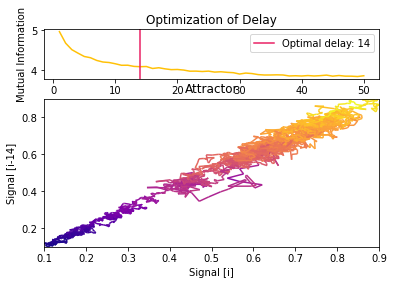

In [ ]:
import neurokit2 as nk
train = MinMax(df)
nk.complexity_delay(df, show=True)

##Dimension

In [ ]:
nk.complexity_embedding(df, delay=2, dimension=5, show=False)

array([[0.19978577, 0.19179965, 0.1925458 , 0.19562366, 0.20407613],
       [0.18720617, 0.19019076, 0.20085836, 0.19613664, 0.20827322],
       [0.19179965, 0.1925458 , 0.19562366, 0.20407613, 0.21287836],
       ...,
       [0.84682522, 0.85482301, 0.85776097, 0.87897958, 0.88930908],
       [0.84891211, 0.84975153, 0.87835002, 0.88482053, 0.89314476],
       [0.85482301, 0.85776097, 0.87897958, 0.88930908, 0.89314476]])

In [ ]:
train, valid, test, index , pacf, fac_min, fac_max , tau, dy = Train_Validation_Test(df)

Tau = 1
Dy = 1


In [ ]:
  """References
    ------------
    - Gautama, T., Mandic, D. P., & Van Hulle, M. M. (2003, April). A differential entropy based method for determining the optimal embedding parameters of a signal. In 2003 IEEE International Conference on Acoustics, Speech, and Signal Processing, 2003. Proceedings.(ICASSP'03). (Vol. 6, pp. VI-29). IEEE.
    - Camplani, M., & Cannas, B. (2009). The role of the embedding dimension and time delay in time series forecasting. IFAC Proceedings Volumes, 42(7), 316-320.
    - Rosenstein, M. T., Collins, J. J., & De Luca, C. J. (1994). Reconstruction expansion as a geometry-based framework for choosing proper delay times. Physica-Section D, 73(1), 82-98.  
    
    if method in ["fraser", "fraser1986", "tdmi"]:
        metric = "Mutual Information"
        algorithm = "first local minimum"

    elif method in ["theiler", "theiler1990"]:
        metric = "Autocorrelation"
        algorithm = "first 1/e crossing"

    elif method in ["casdagli", "casdagli1991"]:
        metric = "Autocorrelation"
        algorithm = "first zero crossing"

    elif method in ["rosenstein", "rosenstein1993", "adfd"]:
        metric = "Displacement"
        algorithm = "closest to 40% of the slope"
    else:
    
    """   

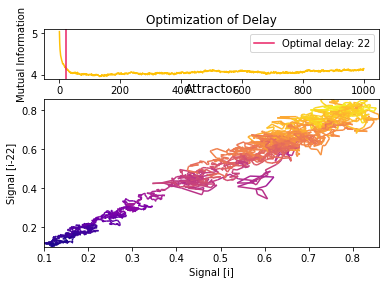

In [ ]:
signal = train
# Find optimal delay(TAU)
delay, parameters = nk.complexity_delay(signal, delay_max=1000, method="fraser1986", show=True)

# Find optimal dimension(Dy)
optimal_dimension, info = nk.complexity_dimension(signal, delay=delay, dimension_max=20, method='afnn', show=True)

##Forecasting

In [ ]:
def forecasting(model, data, dy, diff=False, tau=1, delay=0): 
    if diff == True:
       data = differentiation(data)      
    X, y = split_sequence_takens(data ,tau, dy, delay) 
    pred_array= model.predict(X, verbose=0)
    index= data[tau*dy:].index
    forecasting , real = pd.DataFrame((pred_array), index) , pd.DataFrame(np.array(y), index)
    forecasting , real = forecasting.rename(columns={0: "close"}) , real.rename(columns={0: "close"})
    evaluate_all(real,forecasting)
    return real, forecasting

##Plot Results


In [ ]:
def plot_results(real_data,pred_data, name='Actual and Predicted'):
    plt.plot(np.array(real_data), 'g', label='actual')
    plt.plot(np.array(pred_data), 'b', label='predicted')
    plt.title(name)
    plt.legend()
    plt.show()

##Evaluation

In [ ]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

def u1(f,y):
    y = y.reset_index(drop=True).values.flatten()
    f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i':f, 'y_i': y})
    df['(y_i - f_i)^2'] = np.square(df['y_i'] - df['f_i'])
    df['y_i^2'] = np.square(df['y_i'])
    df['f_i^2'] = np.square(df['f_i'])
    return (np.sqrt(np.mean(df['(y_i - f_i)^2'])))/(np.sqrt(np.mean(df['y_i^2']))+np.sqrt(np.mean(df['f_i^2'])))

def u2(f,y):
    y = y.reset_index(drop=True).values.flatten()
    f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i+1':f, 'y_i+1': y})
    df['y_i'] = df['y_i+1'].shift(periods=1)
    df['numerator'] = np.square((df['f_i+1'] - df['y_i+1']) / df['y_i'])
    df['denominator'] = np.square((df['y_i+1'] - df['y_i']) / df['y_i'])
    df.dropna(inplace=True)
    return np.sqrt(np.sum(df['numerator'])/np.sum(df['denominator']))


def prediction_of_change_in_direction(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    true_sub = np.subtract(y_true[0:(len(y_true) - 1)], y_true[1:(len(y_true))])
    pred_sub = np.subtract(y_pred[0:(len(y_pred) - 1)], y_pred[1:(len(y_pred))])

    mult = true_sub * pred_sub
    result = 0
    for m in mult:
        if m > 0:
            result = result + 1

    return (100 * (result / len(y_true)))

def evaluate_all(actual_df,predicted_df):    

    mse = mean_squared_error(actual, predicted)
    print('MSE: (Mean Squared Error) '+str(mse))

    mae = mean_absolute_error(actual, predicted)
    print('MAE: Mean Absolute Error '+str(mae))

    rmse = math.sqrt(mean_squared_error(actual, predicted))    
    print('RMSE: (Root Mean Square Error): '+str(rmse))

    mape = np.mean(np.abs(predicted - actual)/np.abs(actual))
    print('MAPE (Mean Absolute Percentage Error): '+str(mape))

    pocid = np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))
    print('POCID (Prediction of Change in Direction): '+str(pocid))

    r2 = r2_score(actual,predicted) 
    print('R2 (Coeficiente de Determinação): '+str(r2))

    theilsu1 = u1(predicted_df,actual_df)
    print('Theil’s U1 : '+str(theilsu1))

    theilsu2 = u2(predicted_df,actual_df)
    print('Theil’s U2 : '+str(theilsu2))

    return mse,mae,rmse,mape,pocid,r2,theilsu1,theilsu2

## Import séries 

## Train, Valid Test

In [ ]:
def Train_Validation_Test(df,                 
                            train_start="2000-01-01",
                            train_end="2017-12-31",
                            valid_end="2018-12-31",
                            test_end="2019-12-31",):
    train = []
    valid = []
    test = []
    for e in range(len(Indices)):
        data = pd.Series(np.array(df[e]), index= df[e].index)        
        train_minmax = MinMax(data[train_start:train_end],0.1,0.9)
        min = train_minmax[1]  
        max = train_minmax[2] 
        locals()[e]  = train_minmax[0]        
        train_df = pd.DataFrame(np.array(locals()[e]), columns= [(str("^")+Indices[e])], index= data[train_start:train_end].index)
        train.append(train_df)         

        locals()[e]  = MinMax_valid_test(data[train_end:valid_end],min,max)
        valid_df = pd.DataFrame(np.array(locals()[e]), columns= [(str("^")+Indices[e])], index= data[train_end:valid_end].index)
        valid.append(valid_df)
        
        locals()[e]  = MinMax_valid_test(data[valid_end:test_end],min,max)
        test_df = pd.DataFrame(np.array(locals()[e]), columns= [(str("^")+Indices[e])], index= data[valid_end:test_end].index)
        test.append(test_df)

    #[Train_Valid_Test][Indices]
    return train,valid,test 

##Gráficos

##Séries

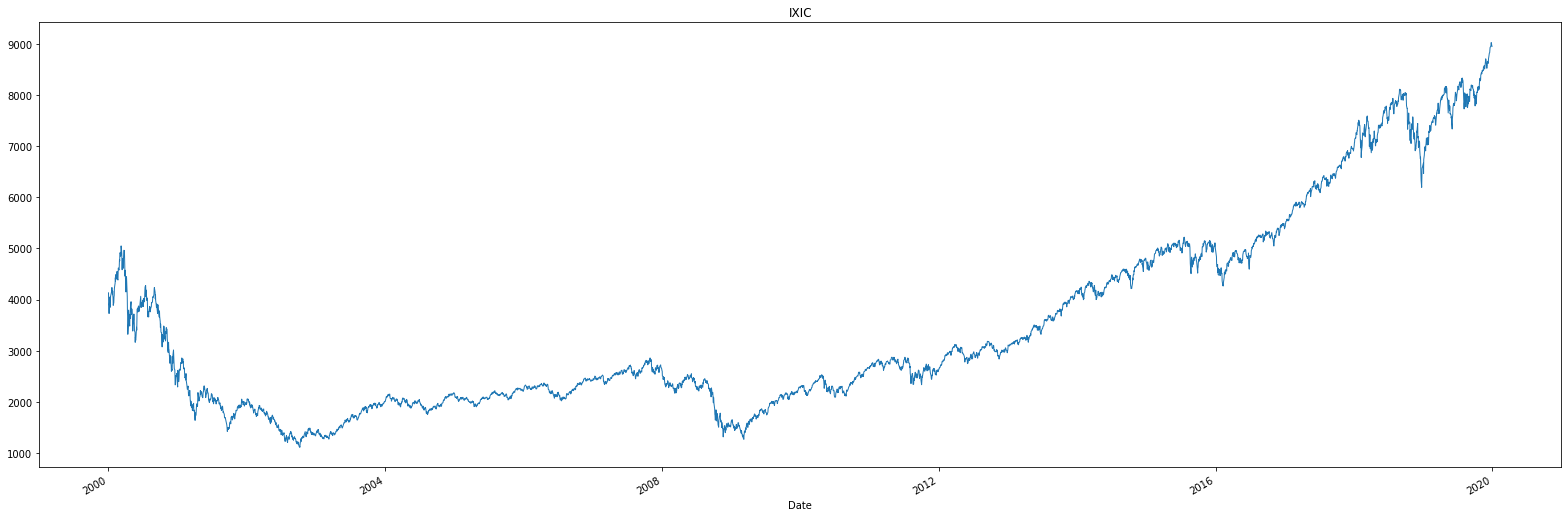

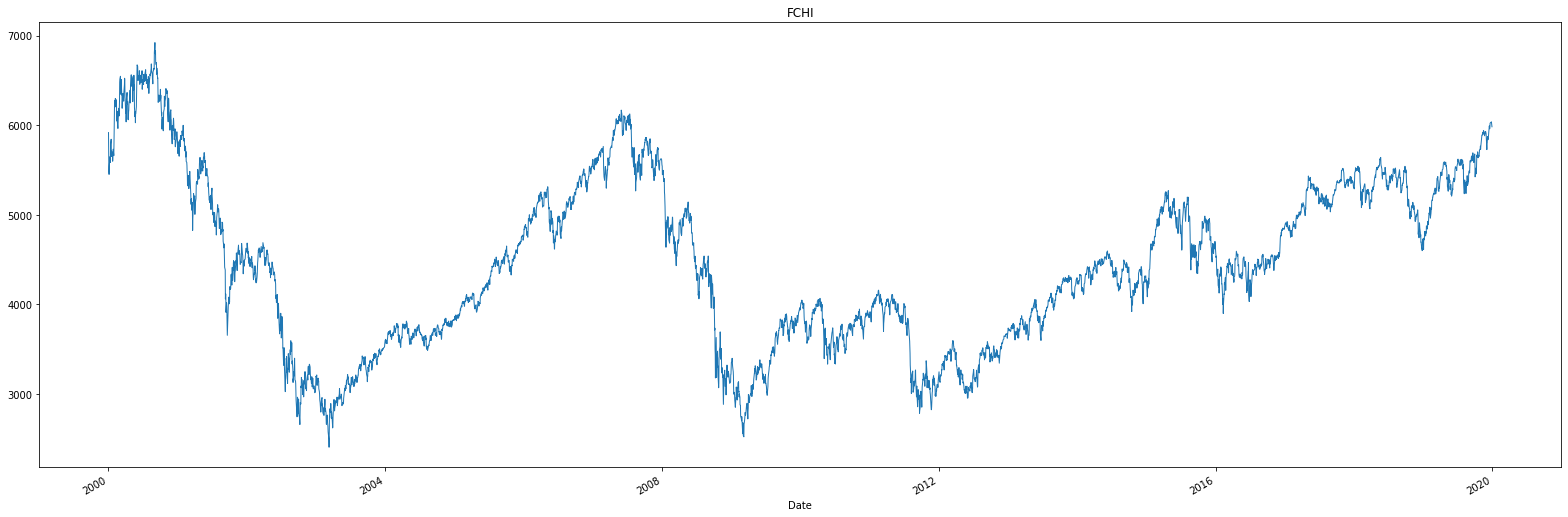

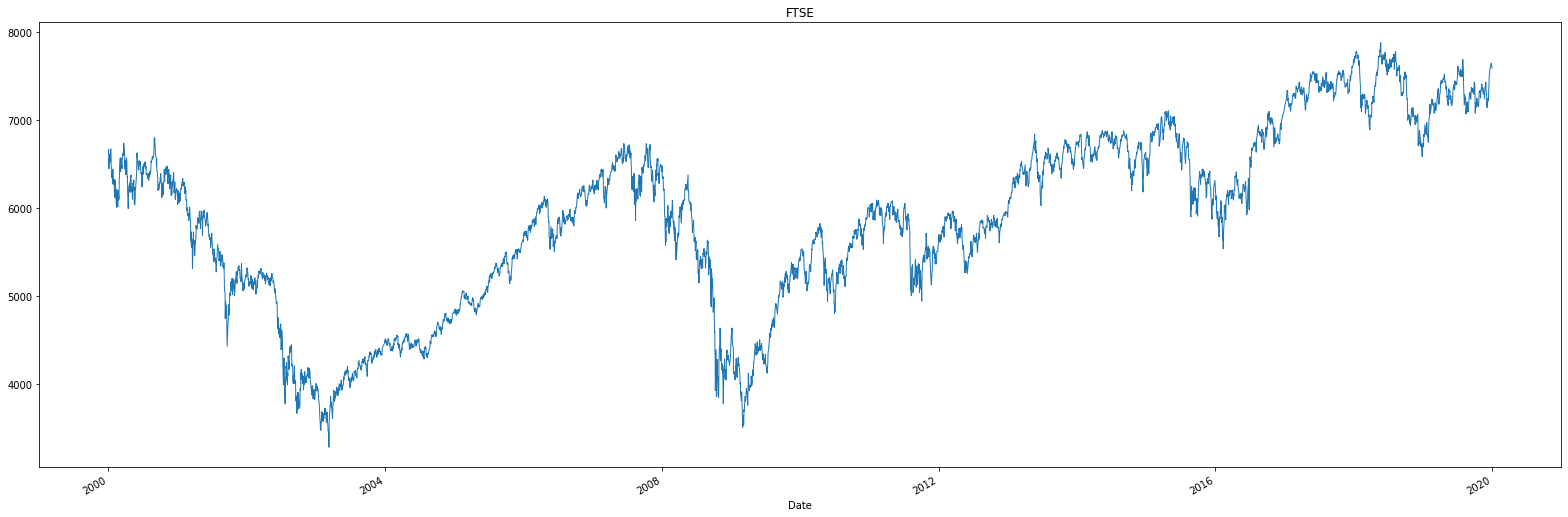

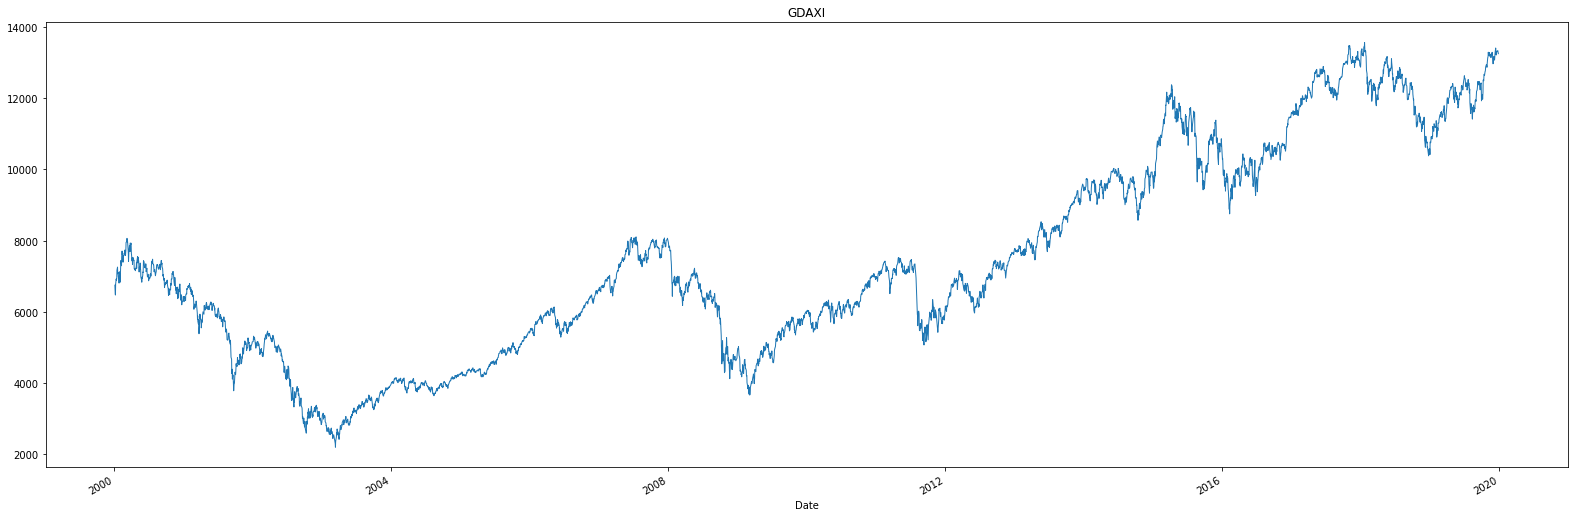

In [ ]:
def plot_series(series_imported):    
    for e in range((len(series_imported[0]))):
        fig = plt.figure(figsize=(60,20))
        ax1 = fig.add_subplot(222)        
        title_acf = str(Indices[e]) 
        series_imported[0][e].plot(title=title_acf,ax=ax1,linewidth=1)
plot_series(series_imported)

In [ ]:
def plot_series(series_imported):    
    for e in range((len(series_imported[1]))):
        fig = plt.figure(figsize=(25,10))
        ax1 = fig.add_subplot(222)        
        title_acf = str(Indices[e])  + " Normalizada"      
        series_imported[1][e].plot(title=title_acf,ax=ax1) #[1] Série Normalizada

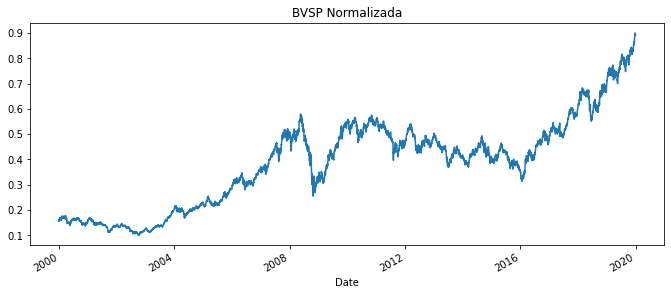

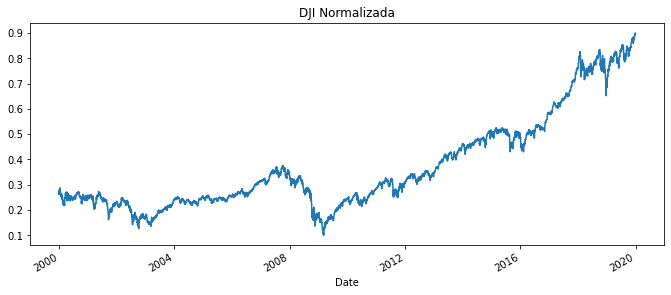

In [ ]:
plot_series(series_imported)

### ACF

In [ ]:
def plot_acf(series_imported):    
    for e in range((len(series_imported[1]))):
        fig = plt.figure(figsize=(25,10))
        ax1 = fig.add_subplot(222)        
        title_acf = "Autocorrelation " + str(Indices[e])        
        sm.graphics.tsa.plot_acf(series_imported[1][e], title=title_acf,lags=(len(series_imported[1][e])-1), ax=ax1) #[1] Série Normalizada

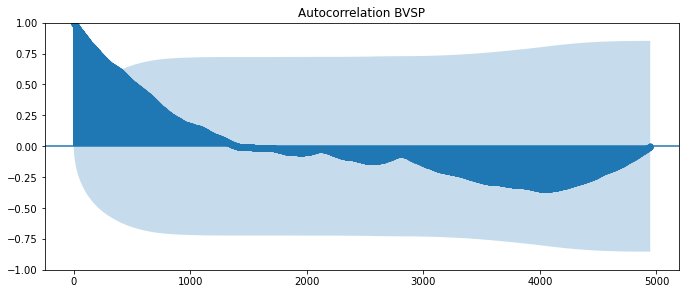

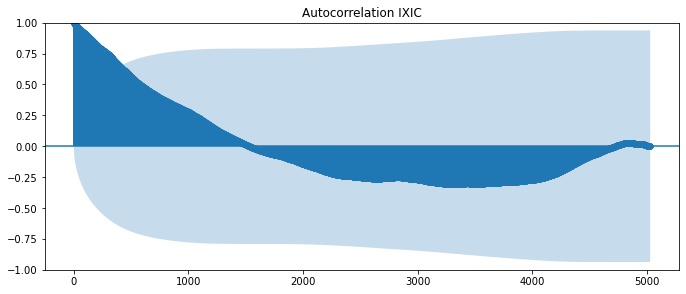

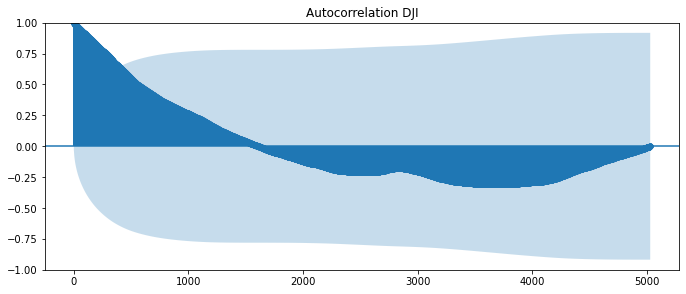

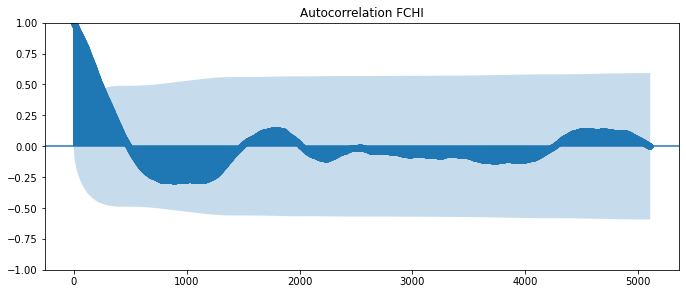

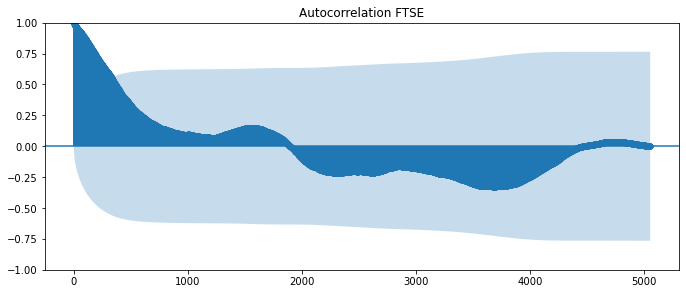

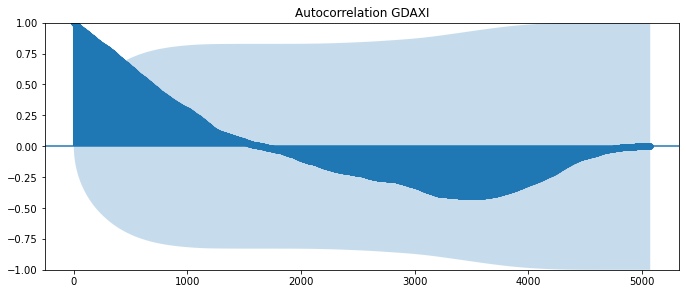

In [ ]:
plot_acf(series_imported)

###PACF

In [ ]:
def plot_pacf(series_imported):
    for e in range(len(series_imported[1])):
        fig = plt.figure(figsize=(25,10))
        ax1 = fig.add_subplot(222)         
        title_pacf = "Partial Autocorrelation " + str(Indices[e])        
        sm.graphics.tsa.plot_pacf(series_imported[1][e], title=title_pacf, lags=100, ax=ax1) #[1] Série Normalizada

### IMM

In [ ]:
def plot_imm(series_imported):
    imm = []
    for e in range(len(series_imported[1])):
        fig = plt.figure(figsize=(25,10))
        ax1 = fig.add_subplot(222)         
        title_imm = "Mutual Information " + str(Indices[e])        
        delay, parameters = nk.complexity_delay(series_imported[1][e], delay_max=(int(len(series_imported[1][e])/2)), show=False, method="fraser1986")
        imm.append(parameters["Scores"]) 
        pd.DataFrame(parameters["Scores"]).plot(title=title_imm, fig=fig, ax=ax1)
    return imm

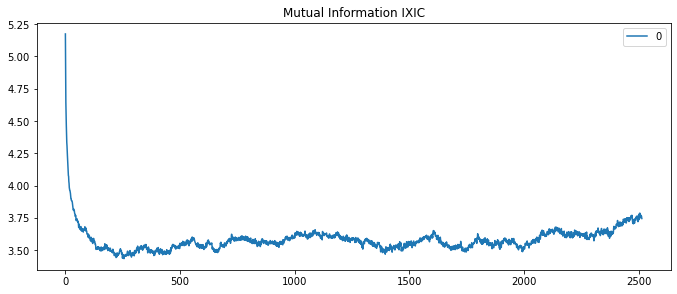

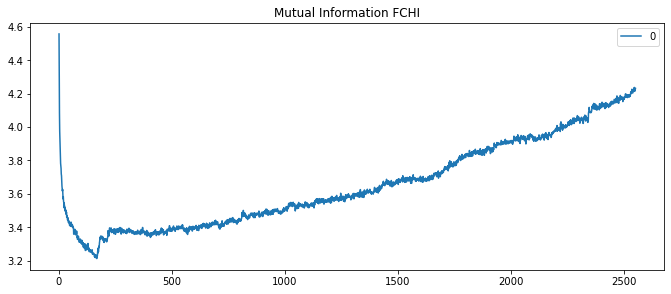

In [ ]:
imm= plot_imm(series_imported)

In [ ]:
imm_values = []
for e in imm:    
    imm_values.append(np.where(e==np.min(e))[0][0])
estatisticas["IMM(Min)"] = imm_values
estatisticas

Min           Max  length  Min  Max      Mean       Var  \
BVSP   8371.000000  76990.000000  4454.0  0.1  0.9  0.501200  0.053534   
IXIC   1114.109985   6994.759766  4528.0  0.1  0.9  0.356724  0.033166   
DJI    6547.049805  24837.509766  4528.0  0.1  0.9  0.371025  0.024943   
FCHI   2403.040039   6922.330078  4597.0  0.1  0.9  0.441905  0.026018   
FTSE   3287.000000   7687.799805  4547.0  0.1  0.9  0.542576  0.029207   
GDAXI  2202.959961  13478.860352  4571.0  0.1  0.9  0.433549  0.032021   

       Kurtosis        CA  PACF  ACF(1/e)  ACF(0)  IMM(Min)  
BVSP  -1.318223 -0.317747   2.0     818.0  1303.0       447  
IXIC   0.016069  0.990542   2.0     663.0  1224.0       255  
DJI    0.360361  1.025210   2.0     705.0  1194.0       474  
FCHI  -0.471069  0.432049   2.0     260.0   430.0       167  
FTSE  -0.666733 -0.307828   2.0     348.0   847.0       371  
GDAXI -0.353613  0.590856   2.0     671.0  1198.0      1209

In [ ]:
def mutual_information(x, y, bins=256):
    """Calculate the mutual information between two random variables.
    Calculates mutual information, I = S(x) + S(y) - S(x,y), between two random variables x and y, where S(x) is the Shannon entropy.
    """
    p_x = np.histogram(x, bins)[0]
    p_y = np.histogram(y, bins)[0]
    p_xy = np.histogram2d(x, y, bins)[0].flatten()

    p_x = p_x[p_x > 0] / np.sum(p_x)
    p_y = p_y[p_y > 0] / np.sum(p_y)
    p_xy = p_xy[p_xy > 0] / np.sum(p_xy)

    h_x = np.sum(p_x * np.log2(p_x))
    h_y = np.sum(p_y * np.log2(p_y))
    h_xy = np.sum(p_xy * np.log2(p_xy))

    return h_xy - h_x - h_y

In [ ]:
delay, parameters = nk.complexity_delay(series_imported[1][1], delay_max=2000, show=True, method="fraser1986")

In [ ]:
signal=df
delay, parameters = nk.complexity_delay(signal, delay_max=1000, show=True, method="fraser1986")
delay, parameters = nk.complexity_delay(signal, delay_max=1000, show=True, method="theiler1990")
delay, parameters = nk.complexity_delay(signal, delay_max=1000, show=True, method="casdagli1991")
delay, parameters = nk.complexity_delay(signal, delay_max=1000, show=True, method="rosenstein1993")
delay, parameters = nk.complexity_delay(signal, delay_max=1000, show=True, method="rosenstein1994")
delay, parameters = nk.complexity_delay(signal, delay_max=1000, show=True, method="lyle2021")

### Hurst

"Série temporal financeira possui características de 
um passeio aleatório (HP= 0.5), 
possui dependência não-linear de curto (0.5 <HP≤ 1) 
longo (0 ≤HP< 0.5) prazos (MENEZES;BARRETO; FREIRE, 2009)."


H = 0,5
Isso é indicativo de uma série browniana . Não há correlação entre as observações atuais e as observações futuras. É difícil prever valores no futuro.

H > 0,5
Isso é indicativo de uma  série temporal persistente . No curto prazo, os valores tenderão a seguir as tendências existentes. Ou seja, aqueles valores que estão aumentando estão previstos para aumentar e vice-versa.

H < 0,5
Isso é indicativo de uma série temporal Anti- Persistente . No curto prazo, os valores tenderão a ir contra as tendências existentes. Ou seja, aqueles valores que estão aumentando estão previstos para diminuir e vice-versa.

In [ ]:
#https://towardsdatascience.com/introduction-to-the-hurst-exponent-with-code-in-python-4da0414ca52e
def hurst(ts,lags):
    """
    Returns the Hurst Exponent of the time series vector ts
    """
    # make sure we are working with an array, convert if necessary
    ts = np.asarray(ts)
    # Helper variables used during calculations
    lagvec = []
    tau = []
    # Create the range of lag values
    lags = range(2, lags)
    #  Step through the different lags
    for lag in lags:
        #  produce value difference with lag
        pdiff = np.subtract(ts[lag:],ts[:-lag])
        
        #  Write the different lags into a vector
        lagvec.append(lag)
        
        #  Calculate the variance of the difference vector
        tau.append(np.sqrt(np.std(pdiff)))

    #  linear fit to double-log graph
    m = np.polyfit(np.log10(np.asarray(lagvec)),np.log10(np.asarray(tau).clip(min=0.001)),1)
    # return the calculated hurst exponent
    return m[0]*2.0

In [ ]:
hurst_exp = []
for lag in range(20,len(df),5):
    hurst_exp.append(hurst(df, lag))
pd.DataFrame(hurst_exp).plot()

In [ ]:
def my_hurst(x, lag):
    z_ajustado = []
    rs = []

    for e in range(0,1+len(x)-lag):
        #print("//")
        std = np.std(x[e:lag+1+e])  #ok
        #print("std " +str(std))
        mean = np.mean(x[e:lag+e]) #ok
        #print("mean " +str(mean))

        if e <= lag:
            z_ajustado.append(x[-1+lag+e] - mean)
            #print("z_ajustado " +str(z_ajustado[:lag+e]))
            max = np.max(np.array(z_ajustado[:lag+e]))      
            #print("max " +str(max)) 
            min = np.min(np.array(z_ajustado[:lag+e]))
            #print("min " +str(min))
        
        else:        
            z_ajustado.append(x[-1+lag+e] - mean)
            #print("z_ajustado " +str(z_ajustado[e-lag:e]))
            max = np.max(np.array(z_ajustado[e-lag:e]))       
            #print("max " +str(max)) 
            min = np.min(np.array(z_ajustado[e-lag:e]))
            #print("min " +str(min))            
        rs.append((max - min)/std)
    pd.DataFrame(rs[lag:]).plot()     
    hurst = np.log2(rs[lag:])/np.log2(range(lag,len(rs)))
    pd.DataFrame(hurst).plot()    
    print(np.mean(hurst))
    
    return rs

In [ ]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 4000)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

# Create a Gometric Brownian Motion
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
np.random.seed(0)

gbm = log(cumsum(randn(100000))+1000)
plt.plot(gbm)
plt.show()
#Calculate Hurst Exponent for GBM
print("Hurst(GBM):   %s" % hurst(df))

Hurst(GBM):   nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


In [ ]:
rs = my_hurst(gbm, 15)

In [ ]:
np.polyfit(np.log(np.array(range(1,len(rs[0])+1))), np.log(rs[0]), 1)
 

In [ ]:
hurst = np.polyfit(np.log(np.array(range(1,len(rs[0][1:])+1))), np.log(rs[0][1:]), 1)
print(hurst)

In [ ]:
for e in range(10, 1000,100):
   print( my_hurst(df, e)[2])

In [ ]:
np.polyfit(np.log(np.array(range(1,len(rs[0])+1))), np.log(rs[0]), 1)

array([0.12332154, 1.5230055 ])

In [ ]:
def plot_hurst(series_imported):
    hurst_pd = []
    for e in range((len(series_imported[1]))):
      hurst = []
      for i in range(4,len(series_imported[1][e]),500):     
          valor = hurst(series_imported[1][e],i)         
          hurst.append(valor)   
      fig = plt.figure(figsize=(25,10))
      ax1 = fig.add_subplot(222)         
      title_hurst= "Hurst Exponent " + str(Indices[e])    
      pd.DataFrame(hurst).plot(title=title_hurst, fig=fig, ax=ax1)
      hurst_pd.append(pd.DataFrame(hurst))
    return hurst_pd

In [ ]:
import numpy as np
def variance_ratio(ts, lag = 2):
    """
    Returns the variance ratio test result
    """
    # make sure we are working with an array, convert if necessary
    ts = np.asarray(ts)
    
    # Apply the formula to calculate the test
    n = len(ts)
    mu  = sum(ts[1:n]-ts[:n-1])/n;
    m=(n-lag+1)*(1-lag/n);
    b=sum(np.square(ts[1:n]-ts[:n-1]-mu))/(n-1)
    t=sum(np.square(ts[lag:n]-ts[:n-lag]-lag*mu))/m
    return t/(lag*b);

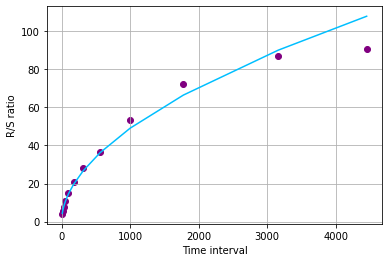

H=0.5275, c=1.2835


In [ ]:
from hurst import compute_Hc, random_walk
rw = random_walk(100000, proba=0.5, min_lookback=1, max_lookback=100, cumprod=False)

H, c, data = compute_Hc(df,  kind='random_walk' ,simplified=True)
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()
print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
pd.DataFrame(np.log(data[1])/np.log(data[0])).plot()

In [ ]:
0.8240*2000**0.5531

55.173038517118236

In [ ]:
data

[[10, 17, 31, 56, 100, 177, 316, 562, 1000, 1778, 3162, 4454],
 [2.6572762258716427,
  3.8652597760831084,
  5.4427678563978255,
  7.789371266938454,
  11.059019480371989,
  15.372137528531642,
  21.14375571336182,
  28.834587110486144,
  39.097725530114815,
  53.49420377971502,
  62.62200135016438,
  80.920787088041]]

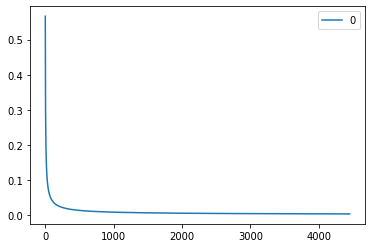

In [ ]:
rs = []
t = []
lg = []
for e in range(3,len(df)):
    t.append(e)
    rs.append(c*e**H)

rs = np.array(rs)
t = np.array(t)
pd.DataFrame(rs/t).plot()

In [ ]:
#https://github.com/erykml/medium_articles/blob/master/Time%20Series/hurst_exponent.ipynb
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""    
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    #print(tau)
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [ ]:
def plot_hurst(series_imported):   
    e_h_df = []
    for e in range(len(Indices)):
        e_h = []
        for i in range(5,len(series_imported[1][e]),50):  
            e_h.append(get_hurst_exponent(series_imported[1][e].values, i))
        e_h_df.append(e_h)
        title_hurst= "Hurst Exponent " + str(Indices[e])     
        pd.DataFrame(e_h).plot(title=title_hurst)
    return e_h_df

In [ ]:
plot_hurst(series_imported)

In [ ]:
e_h_df = []
for e in range(len(Indices)):
    e_h = []
    for i in range(5,len(series_imported[1][e]),500):  
        e_h.append(get_hurst_exponent(series_imported[1][e].values, i))
    e_h_df.append(e_h)


In [ ]:
e_h_df[1].plot()

In [ ]:
import neurokit2 as nk
signal = nk.signal_simulate(duration=2, frequency=5)
h, info = nk.complexity_hurst(np.array(df), windows=1000,corrected=False, show=True)
h  

In [ ]:
info

{'Corrected': False,
 'Intercept': -0.40002187038241066,
 'Scores': array([0.57242278, 0.61563337, 0.65800796, 0.69105745, 0.72539255,
        0.7563959 , 0.78468124, 0.80509302, 0.8374396 , 0.8560324 ,
        0.88603084, 0.90011053, 0.91487786, 0.93968948, 0.96128566,
        0.9747182 , 0.99573667, 1.01454403, 1.02782406, 1.04280499,
        1.04943008, 1.06817441, 1.07681736, 1.09698725, 1.11296066,
        1.12421258, 1.13226534, 1.14266642, 1.16360893, 1.16373712,
        1.18532805, 1.18976096, 1.19676268, 1.20975155, 1.22808611,
        1.23010189, 1.24720411, 1.25198454, 1.2611084 , 1.27067741,
        1.27626806, 1.28613375, 1.28153406, 1.29975976, 1.3125104 ,
        1.32950329, 1.32565685, 1.33309388, 1.34402064, 1.35695388,
        1.35495563, 1.36772564, 1.36606131, 1.38816859, 1.38086816,
        1.39640296, 1.40903841, 1.41533438, 1.41675967, 1.4230423 ,
        1.43266908, 1.44478933, 1.4439246 , 1.4518977 , 1.4498661 ,
        1.46102038, 1.46973742, 1.46478335, 1.484

###LagPlots

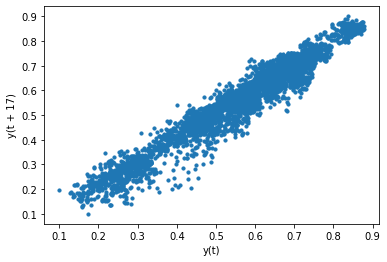

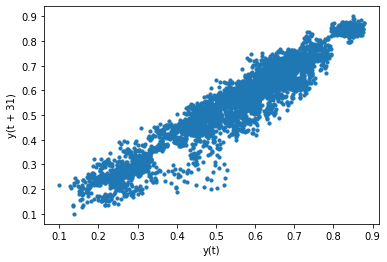

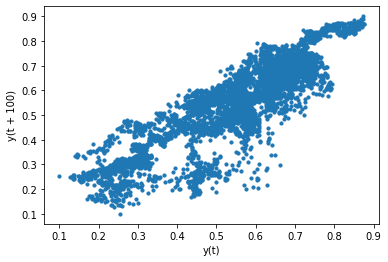

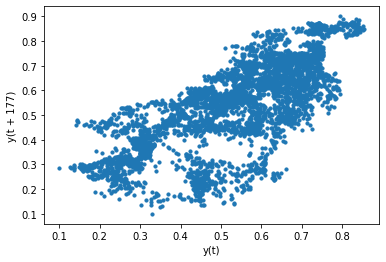

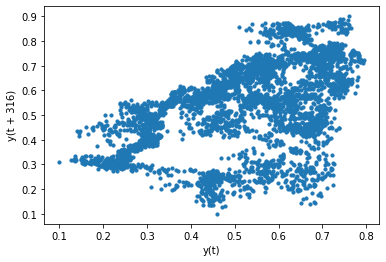

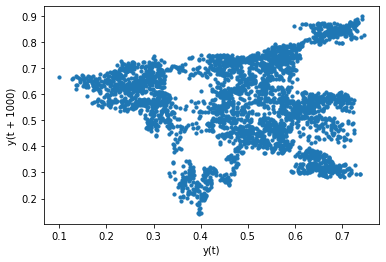

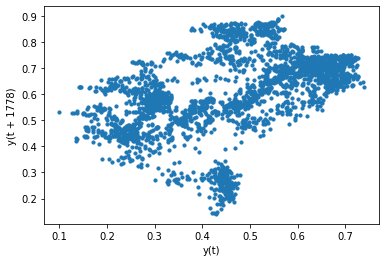

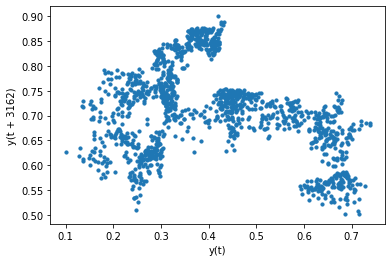

<Figure size 432x288 with 0 Axes>

In [ ]:
for e in [10, 17, 31, 56, 100, 177, 316, 562, 1000, 1778, 3162, 4200]:
    pd.plotting.lag_plot(pd.Series(series_imported[1][4]), lag=e, s=10)
    plt.figure()


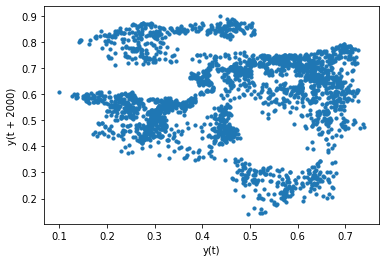

In [ ]:
pd.plotting.lag_plot(pd.Series(series_imported[1][4]), lag=2000,s=10)

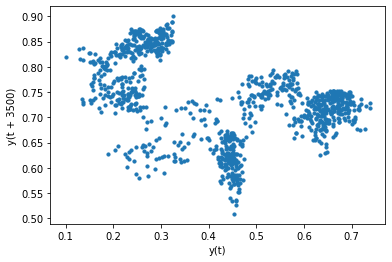

In [ ]:
pd.plotting.lag_plot(pd.Series(series_imported[1][4]), lag=3500,s=10)

In [ ]:
for lag in [20, 100, 300, 500, 1000, 2000, 4000]:
    hurst_exp = get_hurst_exponent(series.values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4393
Hurst exponent with 100 lags: 0.4213
Hurst exponent with 300 lags: 0.4953
Hurst exponent with 500 lags: 0.5116
Hurst exponent with 1000 lags: 0.4477
Hurst exponent with 2000 lags: 0.2283
Hurst exponent with 4000 lags: 0.1838


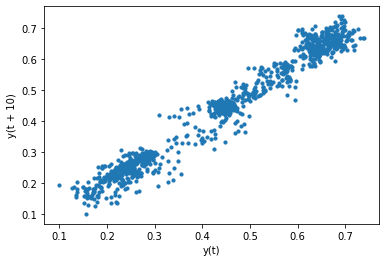

In [ ]:
pd.plotting.lag_plot(pd.Series(series_imported[1][4][:1000]), lag=10,s=10)

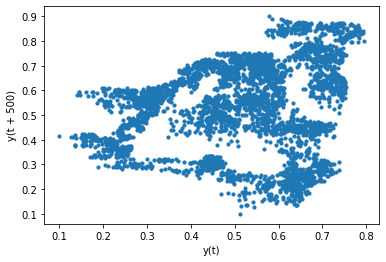

In [ ]:
pd.plotting.lag_plot(pd.Series(series_imported[1][4]), lag=500,s=10)

# ##ARIMA


In [ ]:
real_train = import_indices(index= Indices,
            start="2000-01-01",
            end="2017-12-31",
            a=0.1,
            b=0.9)

real_valid = import_indices(index= Indices,
            start="2018-01-01",
            end="2018-12-31",
            a=0.1,
            b=0.9)

real_test = import_indices(index= Indices,
            start="2019-01-01",
            end="2019-12-31",
            a=0.1,
            b=0.9)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
train_df = pd.DataFrame(train[0])
valid_df = pd.DataFrame(valid[0])
test_df =  pd.DataFrame(test[0])
train_df.plot()
valid_df.plot()
test_df.plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_df.values, order=(2,1,2)).fit()
train_arima = model.predict()

pd.DataFrame(train_df).to_csv('train_df.csv')
pd.DataFrame(train_arima).to_csv('train_arima.csv')

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
# split into train and valid sets

train, valid = train_df.values, valid_df.values

history = [x for x in train]
valid_predictions = list()

# walk-forward validation
for t in range(len(valid)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    valid_predictions.append(yhat)
    obs = valid[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    #print((t/len(valid)))

predicted=0.892807, expected=0.910504
predicted=0.909798, expected=0.911717
predicted=0.911114, expected=0.919318
predicted=0.918753, expected=0.924262
predicted=0.923694, expected=0.927852
predicted=0.927386, expected=0.921848
predicted=0.921726, expected=0.914119
predicted=0.914292, expected=0.927689
predicted=0.927428, expected=0.927503
predicted=0.927251, expected=0.932201
predicted=0.931939, expected=0.933134
predicted=0.932895, expected=0.948954
predicted=0.948287, expected=0.946320
predicted=0.945924, expected=0.949316
predicted=0.949012, expected=0.954620
predicted=0.954237, expected=0.942997
predicted=0.943068, expected=0.977996
predicted=0.977028, expected=0.999576
predicted=0.998205, expected=0.989864
predicted=0.989584, expected=0.987346
predicted=0.987184, expected=0.992371
predicted=0.992036, expected=0.999156
predicted=0.998746, expected=0.982205
predicted=0.982356, expected=0.956789
predicted=0.957705, expected=0.980491
predicted=0.980602, expected=0.967352
predicted=0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.019504, expected=1.024315
predicted=1.023789, expected=1.015945
predicted=1.015859, expected=0.998993
predicted=0.999456, expected=0.997792
predicted=0.998233, expected=1.002257
predicted=1.002380, expected=1.005312
predicted=1.005282, expected=1.000998
predicted=1.001097, expected=0.999028
predicted=0.999175, expected=0.993210
predicted=0.993462, expected=1.009369
predicted=1.009076, expected=1.015537
predicted=1.015063, expected=1.009521


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.009415, expected=1.005638
predicted=1.005717, expected=0.992546
predicted=0.992957, expected=0.992056
predicted=0.992460, expected=0.980712
predicted=0.981220, expected=0.983639
predicted=0.984007, expected=0.993117
predicted=0.993023, expected=0.990680
predicted=0.990619, expected=0.986122
predicted=0.986253, expected=0.994411
predicted=0.994302, expected=0.979488
predicted=0.979736, expected=0.980258
predicted=0.980525, expected=0.997652
predicted=0.997299, expected=0.989491
predicted=0.989351, expected=0.988990
predicted=0.989046, expected=0.985924
predicted=0.986018, expected=0.995834
predicted=0.995657, expected=0.991287
predicted=0.991187, expected=0.973647
predicted=0.974147, expected=0.987673
predicted=0.987749, expected=0.996253
predicted=0.995873, expected=0.998562


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.998265, expected=0.985621
predicted=0.985801, expected=0.968459
predicted=0.969146, expected=0.982729
predicted=0.982964, expected=1.002432
predicted=1.001826, expected=1.002992
predicted=1.002370, expected=0.999797
predicted=0.999544, expected=1.000404
predicted=1.000292, expected=0.998853
predicted=0.998803, expected=0.993898
predicted=0.994018, expected=1.009509
predicted=1.009278, expected=1.010232
predicted=1.009792, expected=1.006385
predicted=1.006281, expected=0.988104
predicted=0.988530, expected=0.973426


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.974323, expected=0.971444
predicted=0.972200, expected=0.966734
predicted=0.967264, expected=0.969555
predicted=0.969893, expected=0.984816
predicted=0.984610, expected=1.003423


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.002635, expected=0.995950
predicted=0.995361, expected=0.996090
predicted=0.995943, expected=0.994901
predicted=0.994773, expected=1.011304
predicted=1.010910, expected=0.977320
predicted=0.977829, expected=0.971024
predicted=0.972008, expected=0.956253
predicted=0.957181, expected=0.967025
predicted=0.967424, expected=0.945200
predicted=0.945992, expected=0.936515
predicted=0.937470, expected=0.922245
predicted=0.923149, expected=0.880950
predicted=0.882071, expected=0.889297
predicted=0.890500, expected=0.897249
predicted=0.897376, expected=0.902915


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.902869, expected=0.918724
predicted=0.918310, expected=0.895943
predicted=0.896106, expected=0.889822
predicted=0.890409, expected=0.863404
predicted=0.864323, expected=0.852806
predicted=0.853450, expected=0.845415
predicted=0.845910, expected=0.850614
predicted=0.850823, expected=0.843246
predicted=0.843582, expected=0.835073
predicted=0.835369, expected=0.827344
predicted=0.827654, expected=0.816350
predicted=0.816725, expected=0.834759
predicted=0.834652, expected=0.843258
predicted=0.842988, expected=0.819381
predicted=0.819660, expected=0.825980
predicted=0.826096, expected=0.829617
predicted=0.829567, expected=0.834887
predicted=0.834757, expected=0.825607
predicted=0.825695, expected=0.839107
predicted=0.838929, expected=0.850719
predicted=0.850150, expected=0.851617
predicted=0.851368, expected=0.861270
predicted=0.860957, expected=0.873803
predicted=0.873367, expected=0.871588
predicted=0.871355, expected=0.876916
predicted=0.876710, expected=0.875191
predicted=0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.930823, expected=0.951822
predicted=0.951390, expected=0.947345
predicted=0.947123, expected=0.939138
predicted=0.939204, expected=0.925206
predicted=0.925533, expected=0.920729
predicted=0.921039, expected=0.894451
predicted=0.895107, expected=0.905899
predicted=0.906135, expected=0.918794
predicted=0.918648, expected=0.901026
predicted=0.901258, expected=0.898006
predicted=0.898269, expected=0.888796
predicted=0.889112, expected=0.892282
predicted=0.892428, expected=0.878898
predicted=0.879223, expected=0.898974
predicted=0.898806, expected=0.884191
predicted=0.884362, expected=0.891513
predicted=0.891595, expected=0.910959
predicted=0.910521, expected=0.905631
predicted=0.905456, expected=0.916310
predicted=0.915986, expected=0.893168
predicted=0.893386, expected=0.896363
predicted=0.896472, expected=0.890708
predicted=0.890934, expected=0.873442
predicted=0.873936, expected=0.877872
predicted=0.878299, expected=0.893308
predicted=0.893109, expected=0.893541
predicted=0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.953158, expected=0.973251
predicted=0.972371, expected=0.969520
predicted=0.969038, expected=0.962164
predicted=0.962040, expected=1.006023
predicted=1.005000, expected=1.006070
predicted=1.004879, expected=0.977984
predicted=0.978043, expected=0.969147
predicted=0.969793, expected=0.974265
predicted=0.974571, expected=1.001756
predicted=1.001240, expected=1.002292
predicted=1.001445, expected=0.979943
predicted=0.979986, expected=0.984292
predicted=0.984576, expected=1.000345
predicted=1.000071, expected=0.996883
predicted=0.996620, expected=0.970814
predicted=0.971314, expected=0.982706
predicted=0.983040, expected=1.001779
predicted=1.001318, expected=0.979360
predicted=0.979021, expected=1.015373
predicted=1.015010, expected=1.021646
predicted=1.020768, expected=1.033246
predicted=1.032328, expected=1.046991
predicted=1.046002, expected=1.036161
predicted=1.035898, expected=1.025027
predicted=1.025272, expected=1.000614
predicted=1.001411, expected=1.000858
predicted=1.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1.026271, expected=1.021949
predicted=1.021810, expected=1.009707
predicted=1.009950, expected=1.012156
predicted=1.012521, expected=1.001243
predicted=1.001567, expected=0.996521
predicted=0.997116, expected=1.001511
predicted=1.001699, expected=0.994971
predicted=0.995161, expected=0.998748
predicted=0.998961, expected=1.027044


In [ ]:
# evaluate forecasts
valid = pd.DataFrame(valid)[0]
valid_predictions = pd.DataFrame(valid_predictions)[0]
evaluate_all(valid,valid_predictions)

NameError: ignored

In [ ]:
pd.DataFrame(valid).to_csv('valid.csv')
pd.DataFrame(valid_predictions).to_csv('valid_predictions.csv')

# plot forecasts against actual outcomes
pyplot.plot(valid)
pyplot.plot(valid_predictions, color='red')
pyplot.show()

In [ ]:
# evaluate an ARIMA model using a walk-forward validation

# split into train and test sets

train, test = train_df.values, test_df.values

history = [x for x in train]
test_predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    test_predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    print(t/len(test))

In [ ]:
# evaluate forecasts
evaluate_all(pd.DataFrame(test),pd.DataFrame(test_predictions))

pd.DataFrame(test).to_csv('test.csv')
pd.DataFrame(test_predictions).to_csv('test_predictions.csv')


# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(test_predictions, color='red')
pyplot.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pmdarima as pm
df = pd.DataFrame(train)
model = pm.auto_arima(df.values, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-29467.203, Time=3.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-29468.088, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-29468.145, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-29468.189, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-29468.708, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-29466.162, Time=2.74 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 9.235 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4454
Model:               SARIMAX(0, 1, 0)   Log Likelihood               14735.354
Date:                Mon, 09 May 2022   AIC                         -29468.708
Time:                        05:29:53   BIC                         -29462.306
Sample:                             0   HQIC                        -29466.45

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4454
Model:                 ARIMA(5, 1, 5)   Log Likelihood               14743.878
Date:                Mon, 09 May 2022   AIC                         -29465.756
Time:                        06:03:56   BIC                         -29395.341
Sample:                             0   HQIC                        -29440.931
                               - 4454                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2056      1.271      0.162      0.872      -2.285       2.697
ar.L2         -0.1327      1.125     -0.118      0.906      -2.338       2.073
ar.L3          0.0643      0.503      0.128      0.8

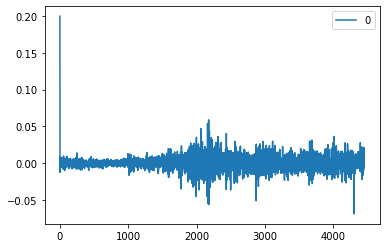

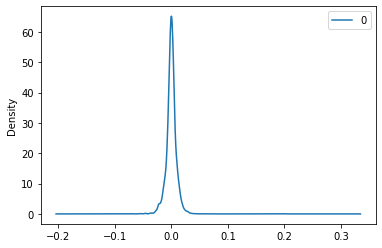

                 0
count  4454.000000
mean      0.000222
std       0.009318
min      -0.069072
25%      -0.003785
50%       0.000264
75%       0.004365
max       0.199786


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# fit model
model = ARIMA((train).values, order=(5,1,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

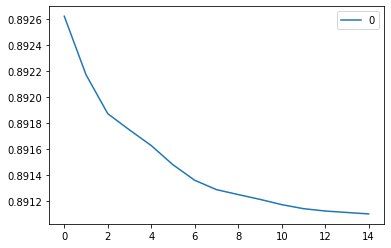

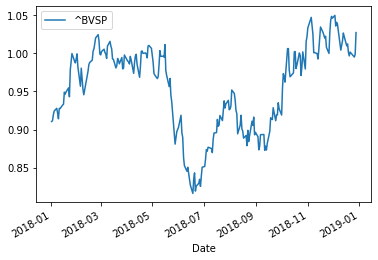

In [ ]:
start= len(train)
end= len(train)+len(valid)

predict = model_fit.forecast(15, alpha=0.05)
predict = pd.DataFrame(predict)
predict.plot()
valid.plot()

In [ ]:
import pmdarima
from pmdarima.arima.utils import ndiffs
df = train
y = train.values

## Adf Test
print(ndiffs(y, test='adf'))  # 2

# KPSS test
print(ndiffs(y, test='kpss') ) # 0

# PP test:
print(ndiffs(y, test='pp'))  # 2

AttributeError: 'list' object has no attribute 'values'

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###MLP

In [ ]:
train_data = pd.read_csv('train_df.csv')
train_arima = pd.read_csv('train_arima.csv')

valid_data = pd.read_csv('valid.csv')
valid_arima = pd.read_csv('valid_predictions.csv')

test_data =  pd.read_csv('test.csv')
test_arima = pd.read_csv('test_predictions.csv')

In [ ]:
train_resid_arima = pd.Series(train_data["^BVSP"][:-1]) - pd.Series(train_arima["0"][1:])
train_resid_arima = (train_resid_arima[1:])[:-1]

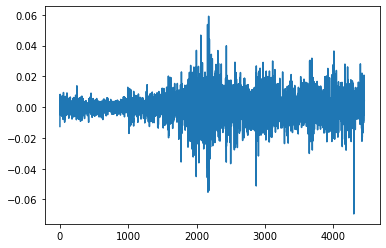

In [ ]:
train_resid_arima.plot()

In [ ]:
valid_resid_arima = pd.Series(valid_data["0"][:-1]) - pd.Series(valid_arima["0"][1:])
valid_resid_arima = (valid_resid_arima[1:])[:-1]

In [ ]:
test_resid_arima = pd.Series(test_data["0"][:-1]) - pd.Series(test_arima["0"][1:])
test_resid_arima = (test_resid_arima[1:])[:-1]

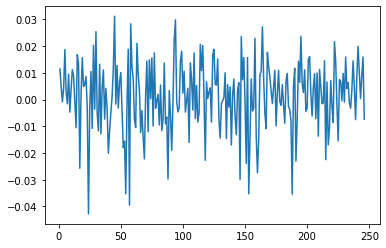

In [ ]:
test_resid_arima.plot()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Time_Lag = 100

def mlp(Time_Lag):
  # define model
  mlp = Sequential()
  mlp.add(Dense(Time_Lag, activation='sigmoid', input_dim=Time_Lag))
  mlp.add(Dense(round(2*np.sqrt(3*Time_Lag))))
  mlp.add(Dense(1))
  mlp.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6),
              loss = "mse")
  return mlp

valid_window  = train_resid_arima[-Time_Lag:]
valid_window.append(valid_resid_arima)

test_window  = valid_resid_arima[-Time_Lag:]
test_window.append(test_resid_arima)

model= mlp(round(100)) 
X, y = split_sequence_takens(train_resid_arima, tau=1, dy=Time_Lag, diff=False, delay=0)  
X_val, y_val = split_sequence_takens(valid_window, tau=1, dy=Time_Lag, diff=False, delay=0)  
X_test, y_test= split_sequence_takens(test_window, tau=1, dy=Time_Lag, diff=False, delay=0)  



es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=30)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

X = X.reshape((X.shape[0], X.shape[1]))  
history=model.fit(X, y, 
                    verbose=1,
                    epochs=200, 
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback,es]
                    )

In [ ]:
model.predict(X_val, verbose=0)

In [ ]:
  #Testing Model
  print("Forecasting Train Data")
  real_train , pred_train = forecasting(model, (train), dy=Time_Lag , diff=False, tau=1, delay=0 )
  
  print("Forecasting Valid Data")
  real_valid , pred_valid = forecasting(model, (valid), dy=Time_Lag , diff=False, tau=1, delay=0 )
  print("Forecasting Test Data")
  real_test  , pred_test  = forecasting(model, (test),  dy=Time_Lag , diff=False, tau=1, delay=0 )

In [ ]:
def resultados(ts=('^BVSP'), 
               model = "mlp",
               period = "7d",
               interval = "1m",
               epochs=10000, 
               patience = 10,
               delay=1,
               diff=False
               ):
  
  
  #Normalização MinMax
  train , min, max = MinMax(train)
  valid = MinMax_valid_test(valid,min,max)
  test = MinMax_valid_test(test,min,max)

  #Diferenciação
  #train = diff(train_)
  #valid = diff(valid_)
  #test = diff(test_)

  print("Normalização concluida")
  if False: 
    plt.plot(train, 'g', label='Train')
    plt.plot(valid, 'b', label='Validação')
    plt.plot(test, 'c', label='Test')
    plt.title('Train, Validation and Test')
    plt.show()

  #Index Data
  print("Divisão dos dados em Treino, validação e teste")

  #Teste de Estacionariedade(ADF)  
  #adf((df - df.shift()))

  #Model
  if model == "narx":
     model=narx(round(dy))
  elif model == 'narx2':
     model= narx2(round(dy))
  elif model == 'mlp':
     model= mlp(round(dy))  
  elif model == 'lstm':
     model= lstm(round(dy))
  
  print("Load Model")
  
  #Time Series Split Rolling Window
  X, y =           split_sequence_takens( train, tau, dy, diff, delay  )   
  X_val, y_val =   split_sequence_takens( valid, tau, dy, diff, delay  ) 
  X_test, y_test = split_sequence_takens( test,  tau, dy, diff, delay=0) 
  print("Rolling Window")

  es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=patience)
  mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

  print("Train Model")
  #Train Model With (Error stabilization stop criterion)
  X = X.reshape((X.shape[0], X.shape[1]))  
  history=model.fit(X, y, 
                    verbose=1,
                    epochs=epochs, 
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback,es]
                    )

  #Testing Model
  print("Forecasting Train Data")
  real_train , pred_train = forecasting(model, (train), dy , diff, tau=1, delay=0 )
  print("Forecasting Valid Data")
  real_valid , pred_valid = forecasting(model, (valid), dy , diff, tau=1, delay=0 )
  print("Forecasting Test Data")
  real_test  , pred_test  = forecasting(model, (test),  dy , diff, tau=1, delay=0 )

  #Results
  print("Resultados")
  plot_results(real_train, pred_train,  name='Train Dataset')
  plot_results(real_valid, pred_valid, name='Valid Dataset')
  plot_results(real_test,  pred_test,  name='Test  Dataset')

  return real_test,pred_test,history,model

#Model

In [ ]:
%tensorboard --logdir $logdir_run

##Narx2

In [ ]:
import tensorflow as tf
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

def narx2(Time_Lag):
  # define model
  narx2 = Sequential()
  narx2.add(SimpleRNN(round(Time_Lag), 
                      input_shape=(Time_Lag, 1), 
                      activation=keras.activations.sigmoid,
                      unroll =True
                      ))                      
  
  narx2.add(Dense(round(2*np.sqrt(3*Time_Lag)), activation=keras.activations.linear))
  narx2.add(Dense(1))
  narx2.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01), 
              loss = "mse")
  return narx2

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=100, 
               patience = 15,
               delay=0,
               diff=False
              )

In [ ]:
#Narx-Takens with diff
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
               diff=False
              )

In [ ]:
import tensorflow as tf
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

Time_Lag = 100
# define model
narx2 = Sequential()
narx2.add(SimpleRNN(round(Time_Lag), 
                    input_shape=(Time_Lag, 2), 
                    activation=keras.activations.sigmoid,
                    return_sequences=True
                    ))

narx2.add(SimpleRNN(round(Time_Lag), 
                    input_shape=(Time_Lag, 2), 
                    activation=keras.activations.sigmoid,
                    return_sequences=True
                    ))

narx2.add(SimpleRNN(round(Time_Lag), 
                    input_shape=(Time_Lag, 2), 
                    activation=keras.activations.sigmoid,
                    return_sequences=False
                    ))

narx2.add(Dense(round(Time_Lag), activation=keras.activations.linear))
narx2.add(Dense(1))
narx2.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01),loss = "mse")
narx2.summary()


###Série Diferenciada

In [ ]:
#Narx-Takens with diff
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
               diff=True
              )

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
               diff=True
              )

###Série não Diferenciada

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=1000, 
               patience = 5,
               delay=0,
               diff=False
              )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 188
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
39/39 [==============================] - 6s 111ms/step - loss: 1.0590 - val_loss: 0.0370
Epoch 2/1000
39/39 [==============================] - 3s 84ms/step - loss: 0.0499 - val_loss: 0.0566
Epoch 3/1000
39/39 [==============================] - 3s 84ms/step - loss: 0.0464 - val_loss: 0.0229
Epoch 4/1000
39/39 [==============================] - 4s 90ms/step - loss: 0.0455 - val_loss: 0.0328
Epoch 5/1000
39/39 [==============================] - 3s 84ms/step - loss: 0.0420 - val_loss: 0.0508
Epoch 6/1000
39/39 [==============================] - 3s 84ms/step - loss: 0.0415 - val_loss: 0.0503
Epoch 7/1000
39/39 [==============================] - 3s 84ms/step - loss: 0.0380 - val_loss: 0.0334
Epoch 8/

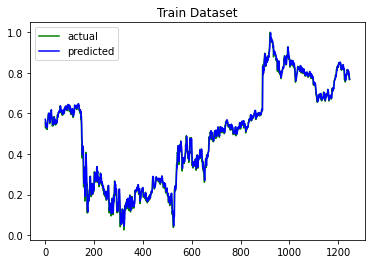

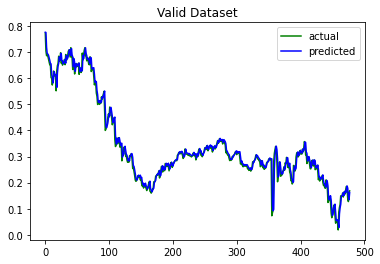

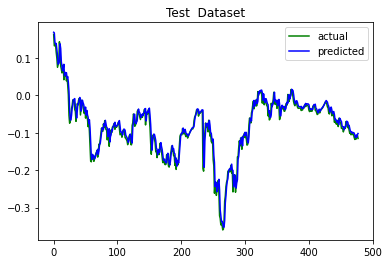

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
               diff=False
              )

In [ ]:
result= resultados(
               model = "narx2",
               ts=('BTC-USD'), 
               period = "3d",
               interval = "1m",
               epochs=100, 
               patience = 25,
               delay=0,
               diff=False
              )

NameError: ignored


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 143
Dy2 = 5
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
43/43 [==============================] - 5s 97ms/step - loss: 0.5153 - val_loss: 0.0347
Epoch 2/1000
43/43 [==============================] - 2s 43ms/step - loss: 0.0232 - val_loss: 0.0248
Epoch 3/1000
43/43 [==============================] - 2s 43ms/step - loss: 0.0228 - val_loss: 0.0431
Epoch 4/1000
43/43 [==============================] - 2s 45ms/step - loss: 0.0220 - val_loss: 0.0414
Epoch 5/1000
43/43 [==============================] - 2s 44ms/step - loss: 0.0216 - val_loss: 0.0646
Epoch 6/1000
43/43 [==============================] - 2s 44ms/step - loss: 0.0204 - val_loss: 0.0460
Epoch 7/1000
43/43 [==============================] - 2s 45ms/step - loss: 0.0204 - val_loss: 0.0424
Epoch 8/1

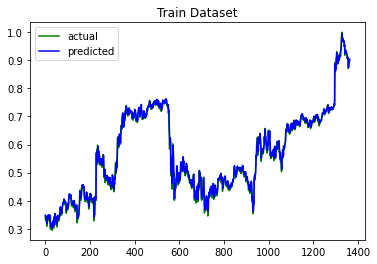

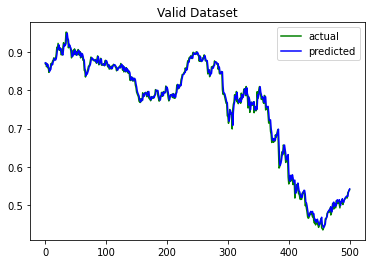

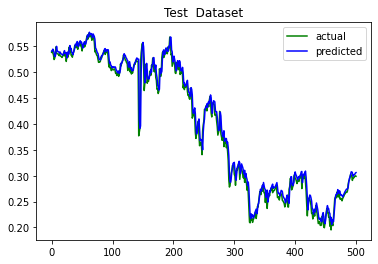

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
              )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 115
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
17/17 [==============================] - 1s 44ms/step - loss: 0.7842 - val_loss: 0.0512
Epoch 2/1000
17/17 [==============================] - 1s 33ms/step - loss: 0.0502 - val_loss: 0.2381
Epoch 3/1000
17/17 [==============================] - 1s 37ms/step - loss: 0.0472 - val_loss: 0.0965
Epoch 4/1000
17/17 [==============================] - 1s 34ms/step - loss: 0.0435 - val_loss: 0.1185
Epoch 5/1000
17/17 [==============================] - 1s 38ms/step - loss: 0.0426 - val_loss: 0.0927
Epoch 6/1000
17/17 [==============================] - 1s 31ms/step - loss: 0.0412 - val_loss: 0.1064
Epoch 7/1000
17/17 [==============================] - 1s 33ms/step - loss: 0.0396 - val_loss: 0.0242
Epoch 8/1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


MSE: (Mean Squared Error) 0.0004261122305886328
MAE: Mean Absolute Error 0.016600312390367314
RMSE: (Root Mean Square Error): 0.020642486056399137
MAPE (Mean Absolute Percentage Error): 0.05755978239356239
POCID (Prediction of Change in Direction): 0.5467289719626168
R2 (Coeficiente de Determinação): 0.8849739958273388
Theil’s U1 : 0.032943534554235605
Theil’s U2 : 1.0585626189710693
Resultados


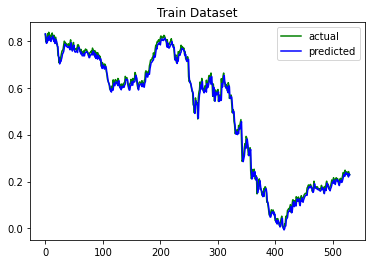

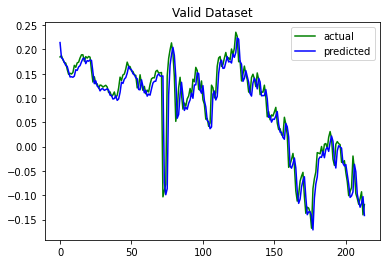

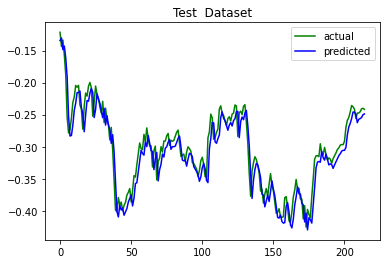

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "3d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
              )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 198
Dy2 = 3
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
45/45 [==============================] - 7s 122ms/step - loss: 1.2093 - val_loss: 0.3190
Epoch 2/1000
45/45 [==============================] - 4s 98ms/step - loss: 0.0570 - val_loss: 0.2108
Epoch 3/1000
45/45 [==============================] - 4s 98ms/step - loss: 0.0533 - val_loss: 0.2383
Epoch 4/1000
45/45 [==============================] - 4s 97ms/step - loss: 0.0517 - val_loss: 0.1855
Epoch 5/1000
45/45 [==============================] - 4s 97ms/step - loss: 0.0498 - val_loss: 0.2077
Epoch 6/1000
45/45 [==============================] - 4s 98ms/step - loss: 0.0467 - val_loss: 0.1957
Epoch 7/1000
45/45 [==============================] - 4s 97ms/step - loss: 0.0438 - val_loss: 0.1552
Epoch 8/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


MSE: (Mean Squared Error) 5.154688865775863e-05
MAE: Mean Absolute Error 0.0050559392246129434
RMSE: (Root Mean Square Error): 0.007179616191535494
MAPE (Mean Absolute Percentage Error): 0.059607268695482114
POCID (Prediction of Change in Direction): 0.6047794117647058
R2 (Coeficiente de Determinação): 0.9837611486850102
Theil’s U1 : 0.02284642523423383
Theil’s U2 : 1.0003012626373757
Forecasting Test Data
MSE: (Mean Squared Error) 7.095075692492097e-05
MAE: Mean Absolute Error 0.005762762286068563
RMSE: (Root Mean Square Error): 0.00842322722743017
MAPE (Mean Absolute Percentage Error): 0.023893499137469066
POCID (Prediction of Change in Direction): 0.5853211009174312
R2 (Coeficiente de Determinação): 0.9972516054434359
Theil’s U1 : 0.010772495321655867
Theil’s U2 : 1.069495126905275
Resultados


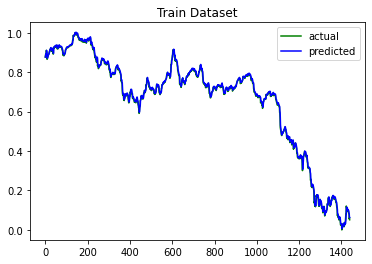

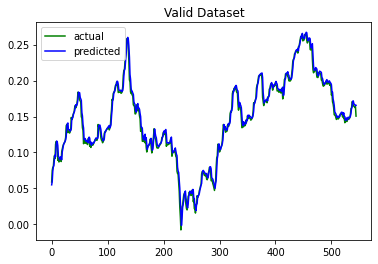

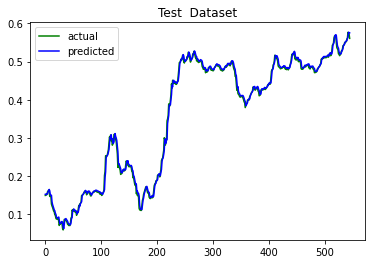

In [ ]:
result= resultados(
               model = "narx2",
               ts=('BNB-USD'), 
               period = "3d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
              )

In [ ]:
-%tensorboard --logdir $logdir_run


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 143
Dy2 = 5
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
43/43 [==============================] - 6s 84ms/step - loss: 0.5324 - val_loss: 0.0289
Epoch 2/1000
43/43 [==============================] - 2s 45ms/step - loss: 0.0226 - val_loss: 0.0466
Epoch 3/1000
43/43 [==============================] - 2s 42ms/step - loss: 0.0221 - val_loss: 0.0530
Epoch 4/1000
43/43 [==============================] - 2s 44ms/step - loss: 0.0244 - val_loss: 0.0352
Epoch 5/1000
43/43 [==============================] - 2s 43ms/step - loss: 0.0218 - val_loss: 0.1025
Epoch 6/1000
43/43 [==============================] - 2s 44ms/step - loss: 0.0220 - val_loss: 0.0561
Epoch 7/1000
43/43 [==============================] - 2s 43ms/step - loss: 0.0218 - val_loss: 0.0507
Epoch 8/1

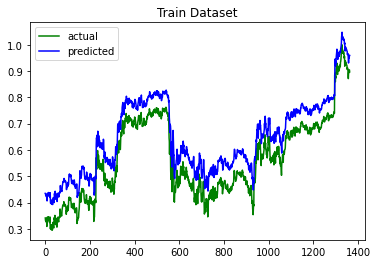

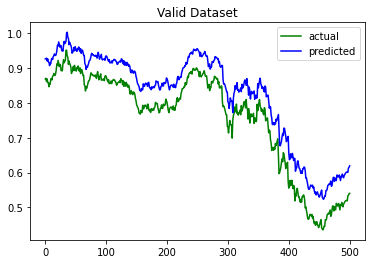

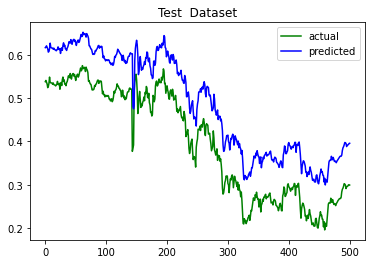

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
              )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 143
Dy2 = 5
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
43/43 [==============================] - 4s 65ms/step - loss: 2.7429 - val_loss: 0.0332
Epoch 2/1000
43/43 [==============================] - 2s 44ms/step - loss: 0.0296 - val_loss: 0.0633
Epoch 3/1000
43/43 [==============================] - 2s 42ms/step - loss: 0.0236 - val_loss: 0.0683
Epoch 4/1000
43/43 [==============================] - 2s 45ms/step - loss: 0.0232 - val_loss: 0.0588
Epoch 5/1000
43/43 [==============================] - 2s 43ms/step - loss: 0.0229 - val_loss: 0.0538
Epoch 6/1000
43/43 [==============================] - 2s 43ms/step - loss: 0.0222 - val_loss: 0.0507
Epoch 7/1000
43/43 [==============================] - 2s 45ms/step - loss: 0.0218 - val_loss: 0.0636
Epoch 8/1

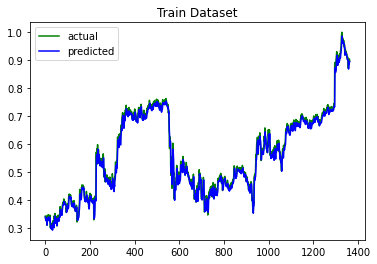

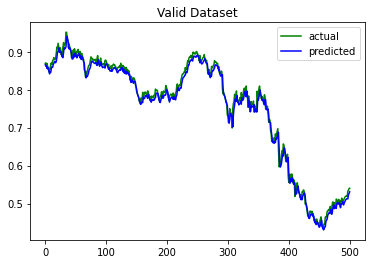

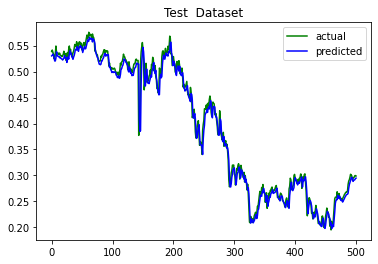

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=1000, 
               patience = 25,
               delay=0,
              )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 200
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/100
128/128 [==============================] - 13s 97ms/step - loss: 2.0589 - val_loss: 0.1829
Epoch 2/100
128/128 [==============================] - 12s 95ms/step - loss: 0.0616 - val_loss: 0.1492
Epoch 3/100
128/128 [==============================] - 12s 97ms/step - loss: 0.0478 - val_loss: 0.0885
Epoch 4/100
128/128 [==============================] - 12s 95ms/step - loss: 0.0154 - val_loss: 0.0011
Epoch 5/100
128/128 [==============================] - 12s 95ms/step - loss: 6.6428e-04 - val_loss: 2.5224e-04
Epoch 6/100
128/128 [==============================] - 13s 104ms/step - loss: 2.9361e-04 - val_loss: 2.7507e-04
Epoch 7/100
128/128 [==============================] - 17s 135ms/step - loss: 2.2

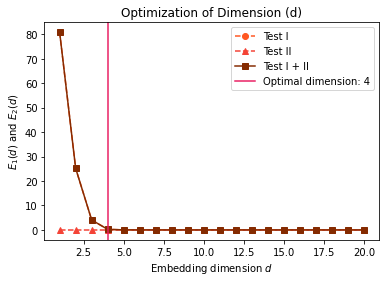

In [ ]:
+result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "max",
               interval = "1d",
               epochs=100, 
               patience = 25,
               delay=0,
               )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 100
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
131/131 [==============================] - 4s 26ms/step - loss: 0.4527 - val_loss: 0.1319
Epoch 2/1000
131/131 [==============================] - 3s 25ms/step - loss: 0.0263 - val_loss: 0.0028
Epoch 3/1000
131/131 [==============================] - 3s 25ms/step - loss: 4.6893e-04 - val_loss: 1.4679e-04
Epoch 4/1000
131/131 [==============================] - 3s 24ms/step - loss: 7.8944e-05 - val_loss: 1.4671e-04
Epoch 5/1000
131/131 [==============================] - 3s 24ms/step - loss: 7.9743e-05 - val_loss: 1.3532e-04
Epoch 6/1000
131/131 [==============================] - 3s 25ms/step - loss: 7.5022e-05 - val_loss: 1.3924e-04
Epoch 7/1000
131/131 [==============================] - 3s 25ms/st

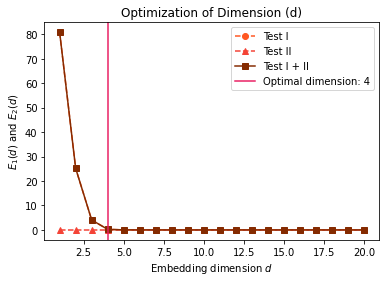

In [ ]:
result= resultados(
               model = "narx2",
               ts=('^BVSP'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 25,
               delay=0,
               )

##LSTM

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

def lstm(Time_Lag):
  # define model
  lstm = Sequential()
  lstm.add(LSTM(Time_Lag, activation='sigmoid', input_shape=(Time_Lag, 1)))
  lstm.add(Dense(2*np.sqrt(3*Time_Lag), activation='sigmoid'))
  lstm.add(Dense(1))
  lstm.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6),
              loss = "mse")
  return lstm

###Série Diferenciada


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 5
Dy = 5
Dy2 = 5
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/100
46/46 [==============================] - 2s 11ms/step - loss: 0.2662 - val_loss: 0.0051
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 6.1613e-04
Epoch 3/100
46/46 [==============================] - 0s 7ms/step - loss: 4.7560e-04 - val_loss: 5.2635e-04
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 4.6630e-04 - val_loss: 5.1561e-04
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 4.6465e-04 - val_loss: 5.1985e-04
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 4.6676e-04 - val_loss: 5.1656e-04
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 4.6504e-04 - v

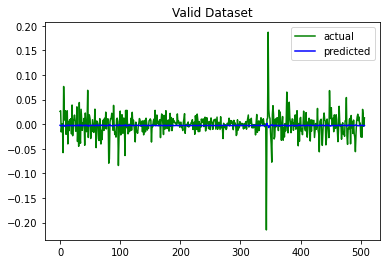

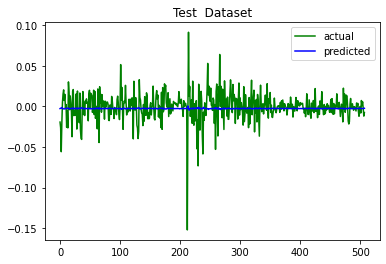

In [ ]:
result= resultados(
               model = "lstm",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=100, 
               patience = 10,
               delay=0,
               diff=True
              )

###Série não Diferenciada


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 198
Dy2 = 6
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/100
41/41 [==============================] - 25s 580ms/step - loss: 0.2634 - val_loss: 0.1514
Epoch 2/100
41/41 [==============================] - 24s 576ms/step - loss: 0.0575 - val_loss: 0.0940
Epoch 3/100
41/41 [==============================] - 24s 580ms/step - loss: 0.0520 - val_loss: 0.0796
Epoch 4/100
41/41 [==============================] - 24s 576ms/step - loss: 0.0423 - val_loss: 0.0576
Epoch 5/100
41/41 [==============================] - 24s 578ms/step - loss: 0.0152 - val_loss: 0.0018
Epoch 6/100
41/41 [==============================] - 24s 581ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 7/100
41/41 [==============================] - 24s 575ms/step - loss: 7.6764e-04 - val_loss: 0.001

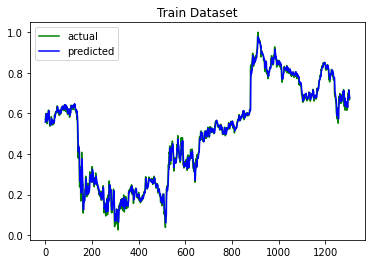

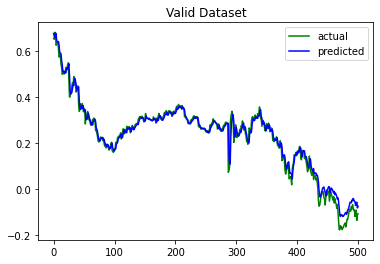

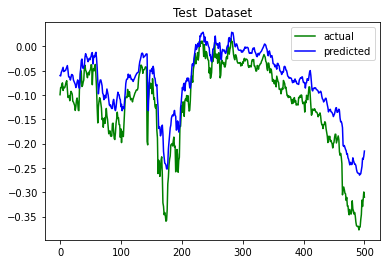

In [ ]:
result= resultados(
               model = "lstm",
               ts=('^BVSP'), 
               period = "7d",
               interval = "1m",
               epochs=100, 
               patience = 10,
               delay=0,
               diff=False
              )

In [ ]:
result= resultados(
               model = "lstm",
               ts=('BTC-USD'), 
               period = "7d",
               interval = "1m",
               epochs=100, 
               patience = 10,
               delay=0,
               diff=False
              )

[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 929
Dy2 = 5
Data Train, Data Validation and Data Test
Normalização concluida
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/100
131/131 [==============================] - 368s 3s/step - loss: 0.9686 - val_loss: 0.3621
Epoch 2/100
131/131 [==============================] - 370s 3s/step - loss: 0.0955 - val_loss: 0.2913
Epoch 3/100
131/131 [==============================] - 346s 3s/step - loss: 0.0956 - val_loss: 0.2715
Epoch 4/100
131/131 [==============================] - 339s 3s/step - loss: 0.0983 - val_loss: 0.2990
Epoch 5/100
131/131 [==============================] - 344s 3s/step - loss: 0.0961 - val_loss: 0.2842
Epoch 6/100
131/131 [==============================] - 338s 3s/step - loss: 0.0980 - val_loss: 0.2289
Epoch 7/100
131/131 [==============================] - 344s 3s/step - loss: 0.0976 - val_loss: 0.2797
Epo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


MSE: (Mean Squared Error) 0.2743679422809978
MAE: Mean Absolute Error 0.521912672525595
RMSE: (Root Mean Square Error): 0.5238014340196081
MAPE (Mean Absolute Percentage Error): 17.90157675956197
POCID (Prediction of Change in Direction): 0.01650943396226415
R2 (Coeficiente de Determinação): -137.91300415192555
Theil’s U1 : 0.7658649159104881
Theil’s U2 : 431.9824137461719
Forecasting Test Data
MSE: (Mean Squared Error) 0.6726084676746724
MAE: Mean Absolute Error 0.8148498304178635
RMSE: (Root Mean Square Error): 0.8201271045848152
MAPE (Mean Absolute Percentage Error): 4.490712123598495
POCID (Prediction of Change in Direction): 0.002357100766057749
R2 (Coeficiente de Determinação): -76.95445476233496
Theil’s U1 : 0.9835901112448309
Theil’s U2 : 162.7220803998797
Resultados



[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 39
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
1
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/100
133/133 [==============================] - 17s 118ms/step - loss: 0.0773 - val_loss: 0.0101
Epoch 2/100
133/133 [==============================] - 16s 119ms/step - loss: 8.1363e-04 - val_loss: 4.9042e-04
Epoch 3/100
133/133 [==============================] - 16s 120ms/step - loss: 2.1648e-04 - val_loss: 2.9316e-04
Epoch 4/100
133/133 [==============================] - 16s 119ms/step - loss: 1.2560e-04 - val_loss: 1.6470e-04
Epoch 5/100
133/133 [==============================] - 17s 125ms/step - loss: 7.0798e-05 - val_loss: 2.0524e-04
Epoch 6/100
133/133 [==============================] - 16s 122ms/step - loss: 5.3568e-05 - val_loss: 1.3269e-04
Epoch 7/100
133/133 [==============================

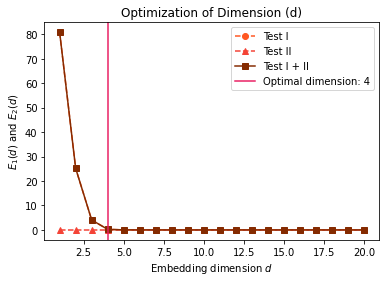

In [ ]:
result= resultados(
               model = "lstm",
               ts=('^BVSP'), 
               period = "max",
               interval = "1d",
               epochs=100, 
               patience = 10,
               delay=1,
              )

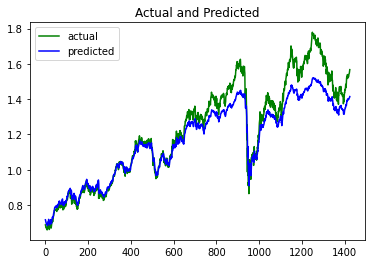

In [ ]:
plt.plot(np.array(result[0]), 'g', label='actual')
plt.plot(np.array(result[1]), 'b', label='predicted')
plt.title('Actual and Predicted')
plt.legend()
plt.show()

In [ ]:
result= resultados(
               model = "lstm",
               ts=('^BVSP'), 
               period = "max",
               interval = "1d",
               epochs=100, 
               patience = 10,
               delay=0,
              )

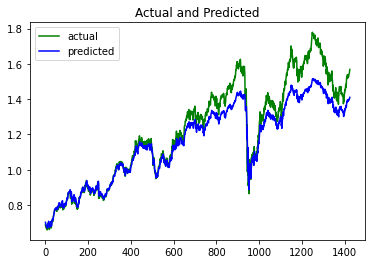

In [ ]:
plt.plot(np.array(result[0]), 'g', label='actual')
plt.plot(np.array(result[1]), 'b', label='predicted')
plt.title('Actual and Predicted')
plt.legend()
plt.show()

##Narx


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#de < dy <= tau.de
def narx(Time_Lag=50):
    class Narx(keras.Model):
        def __init__(self):
            super(Narx, self).__init__(name='narx')
            self.dense = keras.layers.Dense(round(Time_Lag), input_shape=(None, Time_Lag+1), activation=keras.activations.sigmoid)
            self.dense = keras.layers.Dense(round(2*np.sqrt(3*Time_Lag)), activation=keras.activations.linear)
            self.outputLayer = keras.layers.Dense(1, activation=keras.activations.linear)

        def call(self, inputs, training = True):
            if (training):
                x = self.dense(inputs)
                return self.outputLayer(x)
            else: 
                x = self.dense(inputs)
                return self.outputLayer(x)
    narx = Narx()
    narx.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                 loss='mse')
    return narx

###Baixa Frequencia

In [ ]:
result= resultados(
               model = "narx",
               ts=('BTC-USD'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 25,
               delay=0,
               )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 39
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
1
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
50/50 [==============================] - 1s 12ms/step - loss: 0.0182 - val_loss: 0.0026
Epoch 2/1000
50/50 [==============================] - 0s 9ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 3/1000
50/50 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/1000
50/50 [==============================] - 0s 8ms/step - loss: 8.9926e-04 - val_loss: 0.0036
Epoch 5/1000
50/50 [==============================] - 0s 9ms/step - loss: 9.0625e-04 - val_loss: 0.0034
Epoch 6/1000
50/50 [==============================] - 0s 9ms/step - loss: 6.3514e-04 - val_loss: 9.3829e-04
Epoch 7/1000
50/50 [==============================] - 1s 10ms/step - loss: 8.9816e-04 - val_loss: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


17/17 [==============================] - 0s 2ms/step
MSE: (Mean Squared Error) 0.026371396665546352
MAE: Mean Absolute Error 0.1330903902789899
RMSE: (Root Mean Square Error): 0.16239272356095993
MAPE (Mean Absolute Percentage Error): 0.06605653560255982
POCID (Prediction of Change in Direction): 0.5037037037037037
R2 (Coeficiente de Determinação): 0.9614641828913277
Theil’s U1 : 0.03837573518082156
Theil’s U2 : 1.9754847086903444
Resultados


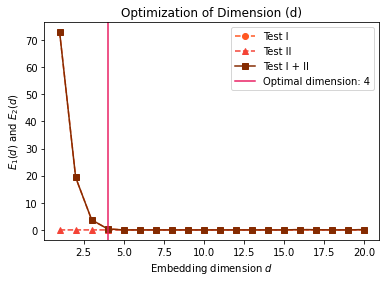

In [ ]:
result= resultados(
               model = "narx",
               ts=('BTC-USD'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 50,
               delay=0,
               )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 39
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
1
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
50/50 [==============================] - 1s 14ms/step - loss: 0.0303 - val_loss: 0.0112
Epoch 2/1000
50/50 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 3/1000
50/50 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 4/1000
50/50 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 5/1000
50/50 [==============================] - 0s 8ms/step - loss: 7.9342e-04 - val_loss: 0.0011
Epoch 6/1000
50/50 [==============================] - 0s 9ms/step - loss: 0.0023 - val_loss: 0.0045
Epoch 7/1000
50/50 [==============================] - 0s 8ms/step - loss: 6.8760e-04 - val_loss: 0.0011
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


17/17 [==============================] - 0s 5ms/step
MSE: (Mean Squared Error) 0.0006888549943966721
MAE: Mean Absolute Error 0.02048406582329773
RMSE: (Root Mean Square Error): 0.02624604721470782
MAPE (Mean Absolute Percentage Error): 0.04875988252271765
POCID (Prediction of Change in Direction): 0.4666666666666667
R2 (Coeficiente de Determinação): 0.9365787502939915
Theil’s U1 : 0.029153715136372056
Theil’s U2 : 1.4898218478697185
Forecasting Test Data
17/17 [==============================] - 0s 2ms/step
MSE: (Mean Squared Error) 0.013662253977641675
MAE: Mean Absolute Error 0.08591275681146918
RMSE: (Root Mean Square Error): 0.11688564487413189
MAPE (Mean Absolute Percentage Error): 0.04272756861966166
POCID (Prediction of Change in Direction): 0.48703703703703705
R2 (Coeficiente de Determinação): 0.9800357920733261
Theil’s U1 : 0.0263486740674625
Theil’s U2 : 1.3556672576782893
Resultados


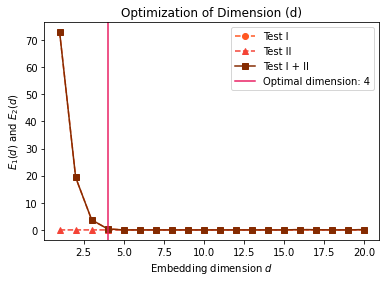

In [ ]:
result= resultados(
               model = "narx",
               ts=('BTC-USD'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 50,
               delay=0,
               )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 39
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
1
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
50/50 [==============================] - 1s 8ms/step - loss: 0.0209 - val_loss: 0.0090
Epoch 2/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3/1000
50/50 [==============================] - 0s 5ms/step - loss: 6.3020e-04 - val_loss: 6.8172e-04
Epoch 4/1000
50/50 [==============================] - 0s 6ms/step - loss: 6.3072e-04 - val_loss: 0.0016
Epoch 5/1000
50/50 [==============================] - 0s 5ms/step - loss: 6.4422e-04 - val_loss: 9.8204e-04
Epoch 6/1000
50/50 [==============================] - 0s 6ms/step - loss: 3.9582e-04 - val_loss: 4.7304e-04
Epoch 7/1000
50/50 [==============================] - 0s 6ms/step - loss: 4.7967e-04 - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


17/17 [==============================] - 0s 2ms/step
MSE: (Mean Squared Error) 0.00713245773923428
MAE: Mean Absolute Error 0.05834570929880309
RMSE: (Root Mean Square Error): 0.08445387936166272
MAPE (Mean Absolute Percentage Error): 0.02839001053846514
POCID (Prediction of Change in Direction): 0.4759259259259259
R2 (Coeficiente de Determinação): 0.9895775362998132
Theil’s U1 : 0.019365546387151152
Theil’s U2 : 1.0029395943956148
Resultados


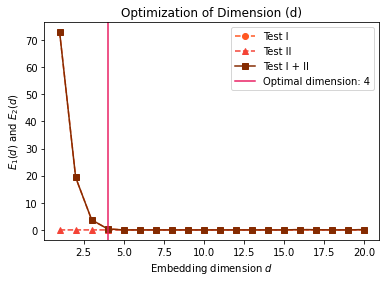

In [ ]:
result= resultados(
               model = "narx",
               ts=('BTC-USD'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 50,
               delay=1,
               )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 39
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
1
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Train Model
Epoch 1/1000
50/50 [==============================] - 1s 7ms/step - loss: 0.0188 - val_loss: 0.0035
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 3/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 4/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 7.0397e-04
Epoch 5/1000
50/50 [==============================] - 0s 5ms/step - loss: 6.1831e-04 - val_loss: 0.0014
Epoch 6/1000
50/50 [==============================] - 0s 5ms/step - loss: 3.9618e-04 - val_loss: 0.0016
Epoch 7/1000
50/50 [==============================] - 0s 5ms/step - loss: 7.3394e-04 - val_loss: 4.7216

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


17/17 [==============================] - 0s 2ms/step
MSE: (Mean Squared Error) 0.007889992392678803
MAE: Mean Absolute Error 0.06407824952107126
RMSE: (Root Mean Square Error): 0.08882562914316341
MAPE (Mean Absolute Percentage Error): 0.03145820795506887
POCID (Prediction of Change in Direction): 0.4981481481481482
R2 (Coeficiente de Determinação): 0.9884705692100842
Theil’s U1 : 0.02048285441712037
Theil’s U2 : 1.0765471052719124
Resultados


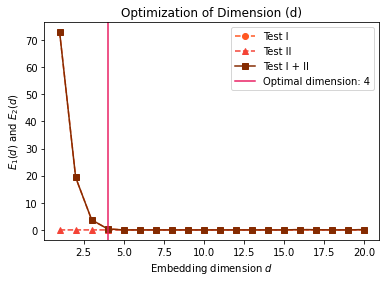

In [ ]:
result= resultados(
               model = "narx",
               ts=('BTC-USD'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 20,
               delay=1,
               )


[*********************100%***********************]  1 of 1 completed
Janela Temporal 15 , 294 e 794


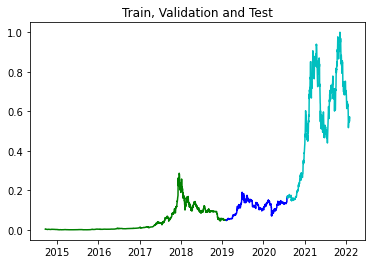

Epoch 1/1000
51/51 [==============================] - 1s 5ms/step - loss: 2.1420e-04 - val_loss: 3.9130e-05
Epoch 2/1000
51/51 [==============================] - 0s 3ms/step - loss: 3.3284e-05 - val_loss: 2.2300e-05
Epoch 3/1000
51/51 [==============================] - 0s 3ms/step - loss: 2.4548e-05 - val_loss: 1.0697e-04
Epoch 4/1000
51/51 [==============================] - 0s 3ms/step - loss: 3.8579e-05 - val_loss: 1.2062e-05
Epoch 5/1000
51/51 [==============================] - 0s 3ms/step - loss: 1.4660e-05 - val_loss: 2.4462e-05
Epoch 6/1000
51/51 [==============================] - 0s 3ms/step - loss: 1.7403e-05 - val_loss: 8.3200e-06
Epoch 7/1000
51/51 [==============================] - 0s 3ms/step - loss: 2.9741e-05 - val_loss: 6.9291e-05
Epoch 8/1000
51/51 [==============================] - 0s 3ms/step - loss: 2.2331e-05 - val_loss: 9.1912e-06
Epoch 9/1000
51/51 [==============================] - 0s 3ms/step - loss: 1.8396e-05 - val_loss: 2.0915e-05
Epoch 10/1000
51/51 [=======

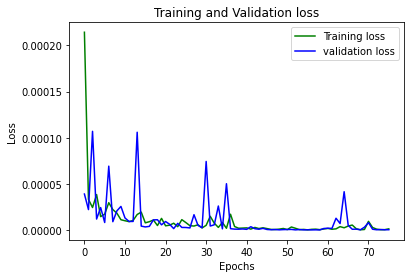

In [ ]:
result= resultados(
               model = "narx",
               ts=('BTC-USD'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 20,
               delay=1,
               )


[*********************100%***********************]  1 of 1 completed
Janela Temporal 2 , 294 e 794


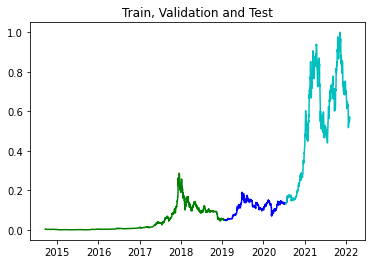

Epoch 1/1000
50/50 [==============================] - 1s 5ms/step - loss: 0.0015 - val_loss: 1.3064e-04
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 1.1444e-04 - val_loss: 9.8618e-05
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 1.0072e-04 - val_loss: 8.9468e-05
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 6.7073e-05 - val_loss: 1.9423e-04
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 1.1079e-04 - val_loss: 1.7282e-04
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 1.0492e-04 - val_loss: 7.8442e-05
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 5.8982e-05 - val_loss: 7.0229e-05
Epoch 8/1000
50/50 [==============================] - 0s 3ms/step - loss: 5.6742e-05 - val_loss: 5.3909e-05
Epoch 9/1000
50/50 [==============================] - 0s 3ms/step - loss: 5.1083e-05 - val_loss: 4.5949e-05
Epoch 10/1000
50/50 [===========

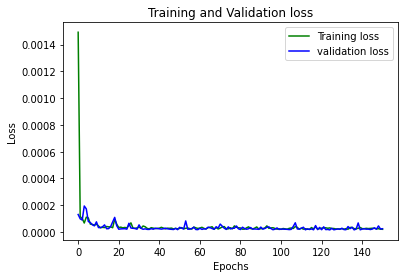

In [ ]:
result= resultados(
               model = "narx",
               ts=('BTC-USD'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 50,
               delay=0,
               )


[*********************100%***********************]  1 of 1 completed
Janela Temporal 15 , 294 e 794


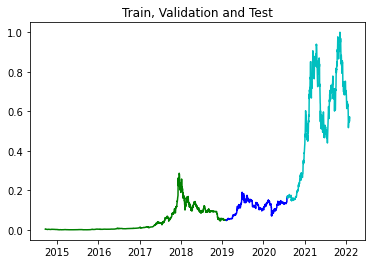

Epoch 1/1000
51/51 [==============================] - 1s 5ms/step - loss: 6.0679e-04 - val_loss: 1.2882e-04
Epoch 2/1000
51/51 [==============================] - 0s 3ms/step - loss: 8.4206e-05 - val_loss: 6.1964e-05
Epoch 3/1000
51/51 [==============================] - 0s 3ms/step - loss: 4.4041e-05 - val_loss: 6.7423e-05
Epoch 4/1000
51/51 [==============================] - 0s 3ms/step - loss: 3.0710e-05 - val_loss: 3.7591e-05
Epoch 5/1000
51/51 [==============================] - 0s 3ms/step - loss: 3.2319e-05 - val_loss: 1.6156e-05
Epoch 6/1000
51/51 [==============================] - 0s 3ms/step - loss: 2.0294e-05 - val_loss: 2.0447e-04
Epoch 7/1000
51/51 [==============================] - 0s 3ms/step - loss: 6.6862e-05 - val_loss: 2.1965e-05
Epoch 8/1000
51/51 [==============================] - 0s 3ms/step - loss: 1.5537e-05 - val_loss: 9.9866e-06
Epoch 9/1000
51/51 [==============================] - 0s 3ms/step - loss: 1.5339e-05 - val_loss: 1.0174e-05
Epoch 10/1000
51/51 [=======

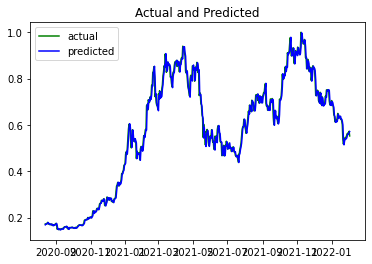

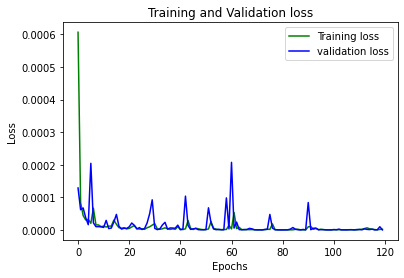

In [ ]:
result= resultados(
               model = "narx",
               ts=('BTC-USD'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 20,
               delay=1,
               )

###Alta Frequencia


[*********************100%***********************]  1 of 1 completed
Janela Temporal 2 , 403 e 675
Epoch 1/500
129/129 [==============================] - 1s 6ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 2/500
129/129 [==============================] - 1s 5ms/step - loss: 6.3992e-04 - val_loss: 6.4441e-04
Epoch 3/500
129/129 [==============================] - 1s 5ms/step - loss: 3.7930e-04 - val_loss: 3.8984e-04
Epoch 4/500
129/129 [==============================] - 1s 5ms/step - loss: 2.7095e-04 - val_loss: 2.9835e-04
Epoch 5/500
129/129 [==============================] - 1s 5ms/step - loss: 2.2013e-04 - val_loss: 3.3419e-04
Epoch 6/500
129/129 [==============================] - 1s 5ms/step - loss: 2.0338e-04 - val_loss: 2.1167e-04
Epoch 7/500
129/129 [==============================] - 1s 5ms/step - loss: 1.5964e-04 - val_loss: 1.9210e-04
Epoch 8/500
129/129 [==============================] - 1s 5ms/step - loss: 1.6153e-04 - val_loss: 1.6837e-04
Epoch 9/500
129/129 [===============

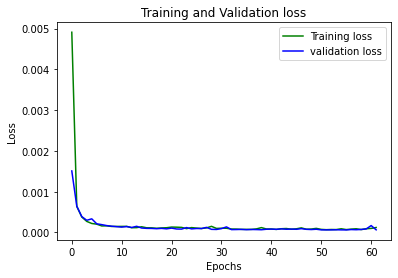

In [ ]:
result=resultados(
            model = "narx",
            ts=('BNB-USD'), 
            period = "7d",
            interval = "1m",
            epochs=500, 
            patience = 10,
            delay=0,
            )


[*********************100%***********************]  1 of 1 completed
Janela Temporal 2 , 405 e 676
Epoch 1/1000
129/129 [==============================] - 1s 5ms/step - loss: 0.0820 - val_loss: 9.7019e-04
Epoch 2/1000
129/129 [==============================] - 1s 5ms/step - loss: 7.2848e-04 - val_loss: 9.7820e-04
Epoch 3/1000
129/129 [==============================] - 1s 4ms/step - loss: 5.0392e-04 - val_loss: 6.3095e-04
Epoch 4/1000
129/129 [==============================] - 1s 4ms/step - loss: 3.7300e-04 - val_loss: 5.0012e-04
Epoch 5/1000
129/129 [==============================] - 1s 5ms/step - loss: 3.1184e-04 - val_loss: 4.0173e-04
Epoch 6/1000
129/129 [==============================] - 1s 5ms/step - loss: 2.7453e-04 - val_loss: 3.2871e-04
Epoch 7/1000
129/129 [==============================] - 1s 5ms/step - loss: 2.3808e-04 - val_loss: 2.7423e-04
Epoch 8/1000
129/129 [==============================] - 1s 5ms/step - loss: 1.9189e-04 - val_loss: 2.4331e-04
Epoch 9/1000
129/129 [==

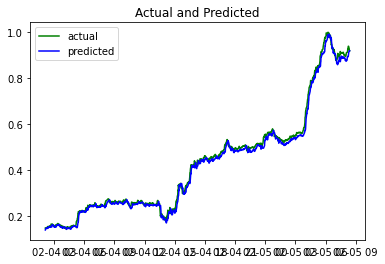

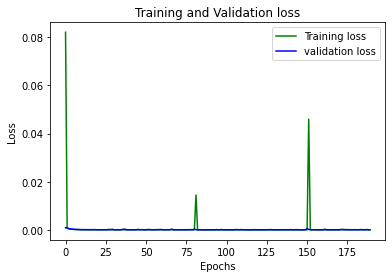

In [ ]:
result=resultados(
            model = "narx",
            ts=('BNB-USD'), 
            period = "7d",
            interval = "1m",
            epochs=1000, 
            patience = 100,
            delay=1,
            )


[*********************100%***********************]  1 of 1 completed
Janela Temporal 2 , 637 e 1094
Epoch 1/500
147/147 [==============================] - 1s 6ms/step - loss: 0.1405 - val_loss: 9.6070e-04
Epoch 2/500
147/147 [==============================] - 1s 5ms/step - loss: 0.0011 - val_loss: 7.4556e-04
Epoch 3/500
147/147 [==============================] - 1s 5ms/step - loss: 7.5356e-04 - val_loss: 5.7608e-04
Epoch 4/500
147/147 [==============================] - 1s 5ms/step - loss: 6.2039e-04 - val_loss: 6.2474e-04
Epoch 5/500
147/147 [==============================] - 1s 5ms/step - loss: 4.9772e-04 - val_loss: 4.5127e-04
Epoch 6/500
147/147 [==============================] - 1s 5ms/step - loss: 4.4165e-04 - val_loss: 4.0531e-04
Epoch 7/500
147/147 [==============================] - 1s 5ms/step - loss: 4.1680e-04 - val_loss: 3.8488e-04
Epoch 8/500
147/147 [==============================] - 1s 6ms/step - loss: 3.5641e-04 - val_loss: 3.4909e-04
Epoch 9/500
147/147 [==============

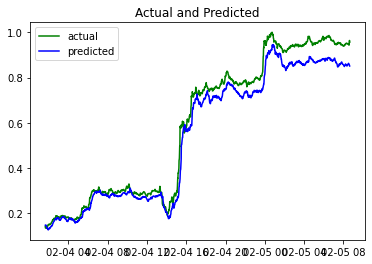

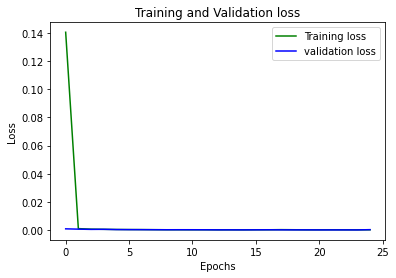

In [ ]:
result=resultados(
            model = "narx",
            ts=('BTC-USD'), 
            period = "7d",
            interval = "1m",
            epochs=500, 
            patience = 10,
            delay=0,
            )


[*********************100%***********************]  1 of 1 completed
Janela Temporal 2 , 404 e 675
Epoch 1/500
129/129 [==============================] - 1s 6ms/step - loss: 0.0571 - val_loss: 6.7408e-04
Epoch 2/500
129/129 [==============================] - 1s 5ms/step - loss: 4.1148e-04 - val_loss: 4.6650e-04
Epoch 3/500
129/129 [==============================] - 1s 5ms/step - loss: 3.0039e-04 - val_loss: 3.4205e-04
Epoch 4/500
129/129 [==============================] - 1s 5ms/step - loss: 2.5465e-04 - val_loss: 3.4218e-04
Epoch 5/500
129/129 [==============================] - 1s 4ms/step - loss: 2.4350e-04 - val_loss: 2.4804e-04
Epoch 6/500
129/129 [==============================] - 1s 5ms/step - loss: 2.0595e-04 - val_loss: 2.2828e-04
Epoch 7/500
129/129 [==============================] - 1s 5ms/step - loss: 1.8298e-04 - val_loss: 2.1547e-04
Epoch 8/500
129/129 [==============================] - 1s 4ms/step - loss: 1.7433e-04 - val_loss: 2.0077e-04
Epoch 9/500
129/129 [===========

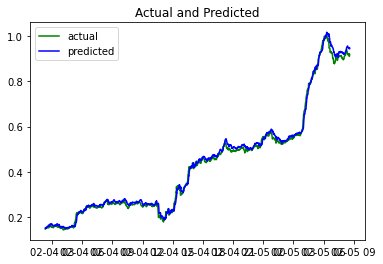

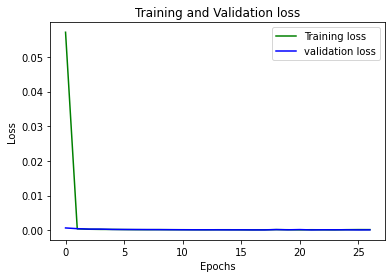

In [ ]:
result=resultados(
            model = "narx",
            ts=('BNB-USD'), 
            period = "7d",
            interval = "1m",
            epochs=500, 
            patience = 10,
            delay=0,
            )


[*********************100%***********************]  1 of 1 completed
Janela Temporal entre 894 e 1715


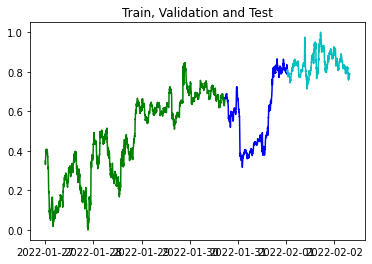

Epoch 1/1000
138/138 [==============================] - 0s 3ms/step - loss: 3.3594e-04 - val_loss: 8.0731e-05
Epoch 2/1000
138/138 [==============================] - 0s 3ms/step - loss: 6.0070e-05 - val_loss: 5.1216e-05
Epoch 3/1000
138/138 [==============================] - 0s 3ms/step - loss: 5.5782e-05 - val_loss: 5.3123e-05
Epoch 4/1000
138/138 [==============================] - 0s 3ms/step - loss: 5.7419e-05 - val_loss: 5.0975e-05
Epoch 5/1000
138/138 [==============================] - 0s 3ms/step - loss: 5.2584e-05 - val_loss: 4.8435e-05
Epoch 6/1000
138/138 [==============================] - 0s 3ms/step - loss: 5.2903e-05 - val_loss: 5.6276e-05
Epoch 7/1000
138/138 [==============================] - 0s 3ms/step - loss: 5.1004e-05 - val_loss: 4.7011e-05
Epoch 8/1000
138/138 [==============================] - 0s 3ms/step - loss: 5.4448e-05 - val_loss: 4.8900e-05
Epoch 9/1000
138/138 [==============================] - 0s 3ms/step - loss: 5.7472e-05 - val_loss: 4.6440e-05
Epoch 10/1

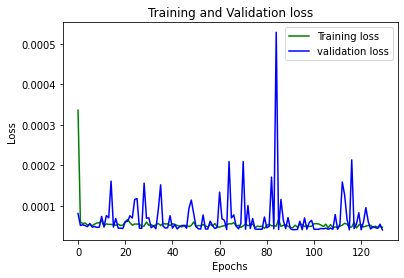

In [ ]:
resultados(
            model = "narx",
            ts=('BTC-USD'), 
            period = "7d",
            interval = "1m",
            epochs=1000, 
            patience = 50,
            delay=0,
            )


[*********************100%***********************]  1 of 1 completed
Janela Temporal 2 , 1135 e 2196


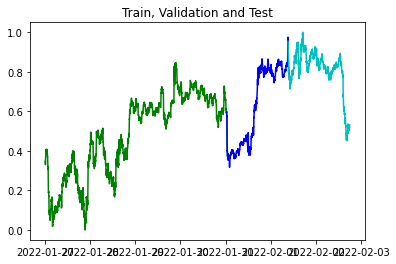

Epoch 1/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.0804 - val_loss: 0.0011
Epoch 2/1000
176/176 [==============================] - 1s 3ms/step - loss: 9.1975e-04 - val_loss: 0.0012
Epoch 3/1000
176/176 [==============================] - 1s 4ms/step - loss: 6.2167e-04 - val_loss: 4.9245e-04
Epoch 4/1000
176/176 [==============================] - 1s 4ms/step - loss: 4.2880e-04 - val_loss: 2.7858e-04
Epoch 5/1000
176/176 [==============================] - 1s 4ms/step - loss: 3.2135e-04 - val_loss: 2.1724e-04
Epoch 6/1000
176/176 [==============================] - 1s 4ms/step - loss: 2.5651e-04 - val_loss: 1.5573e-04
Epoch 7/1000
176/176 [==============================] - 1s 4ms/step - loss: 1.7238e-04 - val_loss: 1.2671e-04
Epoch 8/1000
176/176 [==============================] - 1s 7ms/step - loss: 1.3783e-04 - val_loss: 1.3210e-04
Epoch 9/1000
176/176 [==============================] - 1s 4ms/step - loss: 1.9632e-04 - val_loss: 1.2823e-04
Epoch 10/1000
176/176 

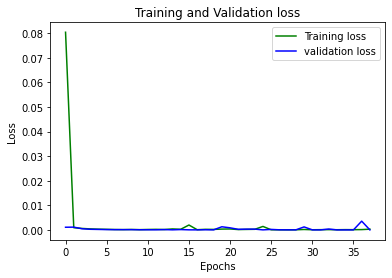

In [ ]:
result=resultados(
            model = "narx",
            ts=('BTC-USD'), 
            period = "7d",
            interval = "1m",
            epochs=1000, 
            patience = 10,
            delay=1,
            )


[*********************100%***********************]  1 of 1 completed
Janela Temporal entre 894 e 1715


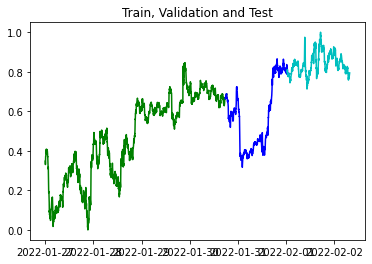

Epoch 1/10000
138/138 [==============================] - 0s 3ms/step - loss: 4.9824e-05 - val_loss: 5.0918e-05
Epoch 2/10000
138/138 [==============================] - 0s 3ms/step - loss: 4.4327e-05 - val_loss: 4.6804e-05
Epoch 3/10000
138/138 [==============================] - 0s 3ms/step - loss: 5.6710e-05 - val_loss: 4.1215e-05
Epoch 4/10000
138/138 [==============================] - 0s 3ms/step - loss: 4.8183e-05 - val_loss: 5.1900e-05
Epoch 5/10000
138/138 [==============================] - 1s 4ms/step - loss: 4.8317e-05 - val_loss: 4.0725e-05
Epoch 6/10000
138/138 [==============================] - 0s 3ms/step - loss: 5.4467e-05 - val_loss: 5.3137e-05
Epoch 7/10000
138/138 [==============================] - 0s 3ms/step - loss: 4.9261e-05 - val_loss: 4.4965e-05
Epoch 8/10000
138/138 [==============================] - 0s 3ms/step - loss: 4.9760e-05 - val_loss: 4.2812e-05
Epoch 9/10000
138/138 [==============================] - 0s 3ms/step - loss: 4.9269e-05 - val_loss: 4.0629e-05
E

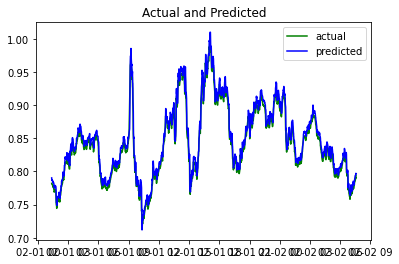

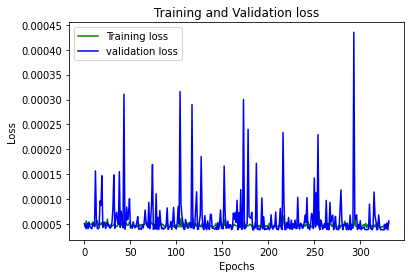

In [ ]:
resultados(
            model = "narx",
            ts=('BTC-USD'), 
            period = "7d",
            interval = "1m",
            epochs=1000, 
            patience = 100,
            delay=0,
            )


[*********************100%***********************]  1 of 1 completed
Janela Temporal entre 627 e 1153


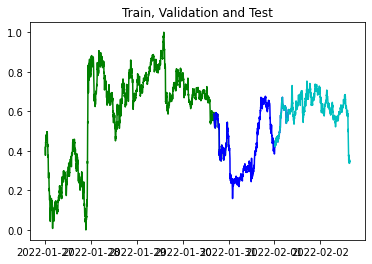

Epoch 1/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.0900 - val_loss: 0.0050
Epoch 2/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 3/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0056
Epoch 4/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 5/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0049
Epoch 6/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.0035 - val_loss: 0.0139
Epoch 7/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 8/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 0.0020
Epoch 9/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 10/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.002

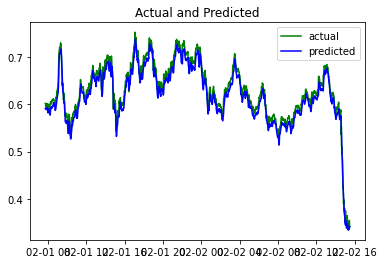

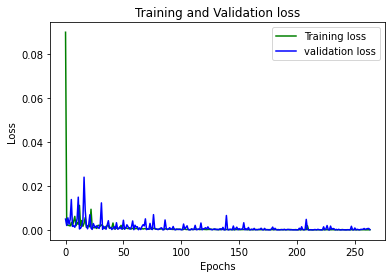

In [ ]:
resultados(
            model = "narx",
            ts=('BNB-USD'), 
            period = "7d",
            interval = "1m",
            epochs=1000, 
            patience = 100,
            delay=0,
            )

In [ ]:
resultados(ts=('TSLA'), 
               period = "7d",
               interval = "1m",
               epochs=5000,       
               patience = 50,
               delay=0,
               )

In [ ]:
result= resultados(ts=('XRP-USD'), 
               period = "7d",
               interval = "1m",
               epochs=5000, 
               patience = 50,
               delay=0,
               )

##MLP

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

def mlp(Time_Lag):
  # define model
  mlp = Sequential()
  mlp.add(Dense(Time_Lag, activation='sigmoid', input_dim=Time_Lag))
  mlp.add(Dense(round(2*np.sqrt(3*Time_Lag))))
  mlp.add(Dense(1))
  mlp.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6),
              loss = "mse")
  return mlp

In [ ]:
result= resultados(
               model = "mlp",
               ts=('^BVSP'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 30,
               delay=1,
               )


[*********************100%***********************]  1 of 1 completed
Importação da série temporal concluida
Tau = 1
Dy = 39
Dy2 = 4
Data Train, Data Validation and Data Test
Normalização concluida
1
Divisão dos dados em Treino, validação e teste
Load Model
Rolling Window
Epoch 1/1000
133/133 [==============================] - 1s 6ms/step - loss: 0.0127 - val_loss: 0.0013
Epoch 2/1000
133/133 [==============================] - 1s 4ms/step - loss: 6.0405e-04 - val_loss: 8.5510e-04
Epoch 3/1000
133/133 [==============================] - 1s 5ms/step - loss: 3.9486e-04 - val_loss: 0.0011
Epoch 4/1000
133/133 [==============================] - 1s 5ms/step - loss: 3.5267e-04 - val_loss: 4.3384e-04
Epoch 5/1000
133/133 [==============================] - 1s 5ms/step - loss: 2.1992e-04 - val_loss: 3.6007e-04
Epoch 6/1000
133/133 [==============================] - 1s 5ms/step - loss: 2.4358e-04 - val_loss: 3.8086e-04
Epoch 7/1000
133/133 [==============================] - 1s 5ms/step - loss: 1.9

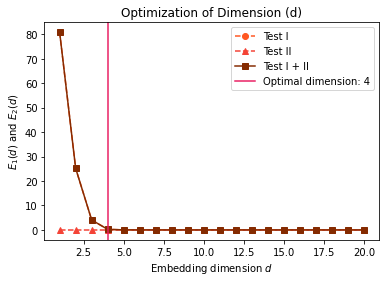

In [ ]:
result= resultados(
               model = "mlp",
               ts=('^BVSP'), 
               period = "max",
               interval = "1d",
               epochs=1000, 
               patience = 30,
               delay=1,
               )

In [ ]:
train, valid, test, index , pacf, fac_min, fac_max , tau , dy = Train_Validation_Test(df)
train , min, max = MinMax(train)
valid = MinMax_valid_test(valid,min,max)
test = MinMax_valid_test(test,min,max)
X, y = split_sequence_takens(train,tau, dy, delay=1)   
X_val, y_val = split_sequence_takens(valid,tau, dy, delay=0) 
X_test, y_test = split_sequence_takens(test,tau, dy, delay=0) 

In [ ]:
#Test Model
pred_array=result[3].predict(X_test, verbose=1)

predicted , actual = pd.DataFrame((pred_array), index=index), pd.DataFrame(np.array(y_test), index=index)
predicted , actual = predicted.rename(columns={0: "close"}), actual.rename(columns={0: "close"})  
evaluate_all(actual,predicted) 

pred_array=result[3].predict(X, verbose=1)
index_train= train[dy:].index
train_predict , train_real = pd.DataFrame((pred_array), index=index_train) , pd.DataFrame(np.array(y), index=index_train)
train_predict , train_real = train_predict.rename(columns={0: "close"}) , train_real.rename(columns={0: "close"})
 
evaluate_all(train_real,train_predict) 

In [ ]:
+plt.plot(np.array(result[0]), 'g', label='actual')
plt.plot(np.array(result[1]), 'b', label='predicted')
plt.title('Actual and Predicted')
plt.legend()
plt.show()

##DELP

In [ ]:
def resultados(ts=('^BVSP'), 
               epochs=1000, 
               delay=1,
               ):
  
  #Importação da Serie Temporal
  TS = Ticker(ts)
  start='2000-12-01'
  end='2021-12-20'
  df=TS.history(start=start, end=end)
  df=df.reset_index(level=[0])
  df.index = pd.to_datetime(df.index)
  del df['symbol']
  df = df['close'] 

  #Normalização MinMax
  df= MinMax(df)

  #Função de AutoCorrelação
  acf_values=sm.tsa.stattools.acf(MinMax(df), nlags=(len(MinMax(df))-1),fft=True)
  fac_min, fac_max = np.where(acf_values<=1/np.e)[0][0],np.where(acf_values<=0)[0][0]
  print("Janela Temporal entre "+str(fac_min)+" e " +str(fac_max))

  #TimeLags
  Time_Lag = 44

  #Model
  model=narx

  #Teste de Estacionariedade(ADF)  
  #adf((df - df.shift()))

  train, valid, test,index = Train_Validation_Test(df,Time_lag = Time_Lag)

  #Index Data
  index = index.index  
  #Split Train Data
  X, y = split_sequence(train, Time_Lag)[0][:] , split_sequence(train, Time_Lag)[1][:]   
  X_val, y_val = split_sequence(train, Time_Lag)[0][:] , split_sequence(train, Time_Lag)[1][:]   
  X_test, y_test = split_sequence(test, Time_Lag)[0][:] , split_sequence(train, Time_Lag)[1][:] 

  es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=10)
  mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

  #Train Model With (Error stabilization stop criterion)
  X = X.reshape((X.shape[0], X.shape[1]))
  history=model.fit(X, y, 
                    epochs=epochs, 
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback,es]
                    )
  #Test Model
  pred_array=[]
  for e in range(len(X_test)):
      pred_array.append(model.predict(np.array([X_test[e],]), verbose=0)[0])
  
  predicted = pd.DataFrame((pred_array), index=index)
  predicted = predicted.rename(columns={0: "close"})

  actual = pd.DataFrame(test, index=index)
  actual = actual.rename(columns={0: "close"})  

  #Results
  evaluate_all(actual,predicted)

  plt.plot(actual, 'g', label='actual')
  plt.plot(predicted, 'b', label='predicted')
  plt.title('Actual and Predicted')
  plt.legend()
  plt.show()

  visualize_loss(history, "Training and Validation Loss")

  return actual,predicted,history
result = resultados()

###Working

In [ ]:
def resultados(ts=('^BVSP'), 
               model = "narx",
               period = "7d",
               interval = "1m",
               epochs=10000, 
               patience = 10,
               delay=1,
               ):
  
  #Importação da Serie Temporal
  df = importdata(ts,period,interval)
  print("Importação da série temporal concluida")
  
  #Data Train, Data Validation and Data Test
  train, valid, test, index , pacf, fac_min, fac_max , tau , dy = Train_Validation_Test(df)
  print("Data Train, Data Validation and Data Test")

  #Normalização MinMax
  train , min, max = MinMax(train)
  valid = MinMax_valid_test(valid,min,max)
  test = MinMax_valid_test(test,min,max)

  #Diferenciação
  #train = diff(train_)
  #valid = diff(valid_)
  #test = diff(test_)

  print("Normalização concluida")
  if False: 
    plt.plot(train, 'g', label='Train')
    plt.plot(valid, 'b', label='Validação')
    plt.plot(test, 'c', label='Test')
    plt.title('Train, Validation and Test')
    plt.show()

  #Index Data
  index = test[dy:].index
  print("1")
  print("Divisão dos dados em Treino, validação e teste")

  #Teste de Estacionariedade(ADF)  
  #adf((df - df.shift()))

  #Model
  if model == "narx":
     model=narx(round(dy))
  elif model == 'mlp':
     model= mlp(round(dy))  
  elif model == 'lstm':
     model= lstm(round(dy))
  
  print("Load Model")
  
  #Time Series Split Rolling Window
  X, y = split_sequence_takens(train,tau, dy, delay)   
  X_val, y_val = split_sequence_takens(valid,tau, dy, delay) 
  X_test, y_test = split_sequence_takens(test,tau, dy, delay=0) 
  print("Rolling Window")

  es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=patience)
  mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

  #Train Model With (Error stabilization stop criterion)
  X = X.reshape((X.shape[0], X.shape[1]))  
  history=model.fit(X, y, 
                    verbose=1,
                    epochs=epochs, 
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback,es]
                    )
  print("Train Model")

  #Test Model
  pred_array=model.predict(X_test, verbose=1)
  print("Predict Model")
  print(len(pred_array),len(y_test), len(index))
 
  predicted , actual = pd.DataFrame((pred_array), index=index), pd.DataFrame(np.array(y_test), index=index)
  predicted , actual = predicted.rename(columns={0: "close"}), actual.rename(columns={0: "close"})  

  #Results
  evaluate_all(actual,predicted)  
  print("Resultados")

  return actual,predicted,history,model

In [ ]:
def resultados(ts=('^BVSP'), 
               model = "narx",
               period = "7d",
               interval = "1m",
               epochs=10000, 
               patience = 10,
               delay=1,
               ):
  
  #Importação da Serie Temporal
  df = importdata(ts,period,interval)

  #Normalização MinMax
  df= MinMax(df)

  #Função de AutoCorrelação
  pacf, fac_min, fac_max  = acf_pacf(MinMax(df))

  #TimeLags
  Time_Lag = round(np.sqrt(fac_max))

  #Model
  if model == "narx":
     model=narx(Time_Lag)
  elif model == 'mlp':
     model= mlp(Time_Lag)

  #Teste de Estacionariedade(ADF)  
  #adf((df - df.shift()))

  #Data Train, DataValidation and Data Test
  train, valid, test, index = Train_Validation_Test(df, Time_Lag)

  #Index Data
  index = index.index  
  
  #Time Series Split Rolling Window
  X, y = split_sequence(train, Time_Lag, delay)   
  X_val, y_val = split_sequence(train, Time_Lag, delay=0) 
  X_test, y_test = split_sequence(test, Time_Lag, delay=0) 

  es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=patience)
  mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

  #Train Model With (Error stabilization stop criterion)
  X = X.reshape((X.shape[0], X.shape[1]))
  history=model.fit(X, y, 
                    verbose=1,
                    epochs=epochs, 
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback,es]
                    )
  #Test Model
  pred_array=model.predict(X_test, verbose=1)
  
  predicted , actual = pd.DataFrame((pred_array), index=index), pd.DataFrame(test, index=index)
  predicted , actual = predicted.rename(columns={0: "close"}), actual.rename(columns={0: "close"})  

  #Results
  evaluate_all(actual,predicted)

  plt.plot(actual, 'g', label='actual')
  plt.plot(predicted, 'b', label='predicted')
  plt.title('Actual and Predicted')
  plt.legend()
  plt.show()

  visualize_loss(history, "Training and Validation Loss")

  return actual,predicted,history

In [ ]:
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd

import timeit

def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

def entropy3(labels, base=None):
  vc = pd.Series(labels).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

def entropy4(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()